<a href="https://colab.research.google.com/github/lk420347749/electronicsales/blob/main/RPS1_Problem_Set_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem set: Statistics and Meta-analysis of Clinical Data Sets

[](#RemoveThisTextCell)
## Preface: Run this whole section each time you return to working on this assignment

[](#RemoveThisTextCell)
### **Important information about this assignment**

[](#RemoveThisTextCell)

This Jupyter notebook for Colab contains the tasks for the summative Problem set assessment on your Research and Professional Skills I module in the Autumn term of Year 2 on the Neuroscience, Biochemistry and Biomedical Sciences courses at the University of Sussex. The assignment is designed to assess your:

* Ability to extract and interpret quantitative information from scientific writing
* Fluency at loading, processing and analysing quantative data using the R statistical programming environment
* Ability to appropriately and effectively represent data within tables and graphs
* Ability to interpret, and demonstrate a conceptual understanding of, statistics and related mathematical formulae

Do not share or collaborate on this assignment - doing so could be regarded as plagiarism or collusion, which could be identified by Turnitin.

You are welcome to use generative AI as a learning tool, but not as a means to give answers to questions directly asked in this assignment - doing so could be regarded as personation, which could also be identified by Turnitin. Please see the guide on appropriate use of AI and frequently asked AI questions relevant to this assignment [here](https://colab.research.google.com/drive/1lgwKae5GL35LK6yEVc7AeZLi8e8TwKR_?usp=sharing).

To complete this assignment, complete <u><b>ALL</b></u> the tasks requested and enter your answers to <u><b>ALL</b></u> questions into the code cells provided.  

* <font color='blue'> <u><b>Coding Tasks</u></b> are stated in blue font.</font><br> <tt><mark>Names</mark></tt> that are highlighted are those of variables that you must assign values to, or calculate the value of, in your code as part of the task. Other variables may also be created in the process as long as the ones <tt><mark>named</mark></tt> in the task exist in your code.
* <font color='red'> <u><b>Questions</u></b> for you to answer are in red font.</font><br> Enter your answers in the next text cell that after the question where it says *Replace this text with your answer*.

Do <u><b>NOT</b></u> change the structure of this notebook by creating or deleting text or code cells. Removing required content could have an impact on your mark in this assessment.

### **Running the code cell below loads `rpy2.ipython` so that you can use R in Colab**

[](#RemoveThisTextCell)
The `%%capture` cell magic command in the first line of the code cell suppresses cell output.  
The `%load_ext` magic command loads the external package listed into python, in this case `rpy2.ipython`.  
You should **not** change the code cell below and no action is required from you.

In [ ]:
%%capture
%load_ext rpy2.ipython

### **Entering your candidate number below is necessary to setup this assignment**

In [ ]:
#RemoveCellInputFromHTML

#!!!!!!!!!!!!!!!!!!!!!! DO NOT EDIT THIS PYTHON CODE CELL !!!!!!!!!!!!!!!!!!!!!!
# You can see this code because you accidently clicked 'Show code' for this
# hidden cell. Hide it again by clicking the button in the top-left corner of
# this cell containing a down arrowhead symbol (⌄). (If you hover the mouse
# cursor over the button in question for a couple of seconds, a tool-tip will
# appear saying "Hide code".)

# @title ##### If your candidate number is entered into the form below, you just need to (re)run the hidden code cell  - <mark>Do <b><u>NOT</u></b> click '<tt>Show code</tt></mark>' {"run":"auto","vertical-output":true,"form-width":"20%","display-mode":"form"}
cand_no = 282230 # @param {type:"integer"}
print("Candidate number: {0}\n".format(cand_no))
if (cand_no == 0) or (len(str(cand_no)) != 6):
  print("!!! You must enter your six digit candidate number !!!", )

# Setup R variable inspector widget

# Import required python modules
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
import ipywidgets as widgets # Loads the Widget framework.

# Send candidate number to R
if cand_no is None:
  cand_no = 0;
robjects.r("cand_no <- {0}".format(cand_no))

# Define wrappers for r functions to return dimensions of r objects if applicable
robjects.r('''
ncols = function (x) {
  if (!is.null (ncol(x))) {
    ns = as.character (ncol (x))
  } else {
    ns = 1
  }
  return (ns)
}
nrows = function (x) {
  if (!is.null (nrow(x))) {
    ns = as.character (nrow (x))
  } else {
    ns = length (x)
  }
  return (ns)
}
inspect = function (x) {
  if (!is.null (names(x))) {
    retval = as.character (names (x))
  } else {
    retval = x
  }
  if (class(x)[1] == 'matrix') {
    retval = "< Cannot display content of matrices >"
  }
  return (retval)
}
''')

# Get python handles for R functions
r_get     = robjects.r["get"]
r_setdiff = robjects.r["setdiff"]
r_class   = robjects.r["class"]
r_ls_str  = robjects.r["ls.str"]
r_lsf_str = robjects.r["lsf.str"]
r_ncols   = robjects.globalenv['ncols']
r_nrows   = robjects.globalenv['nrows']
r_inspect = robjects.globalenv['inspect']

class VariableInspectorWindow(object):

  instance = None

  def __init__(self, ipython):
    """Public constructor."""
    if VariableInspectorWindow.instance is not None:
      raise Exception("""Only one instance of the Variable Inspector can
exist at a time.  Call close() on the active instance before
creating a new instance. If you have lost the handle to the
active instance, you can re-obtain it via
`VariableInspectorWindow.instance`.""")

    VariableInspectorWindow.instance = self
    self.closed = False
    self.namespace = []

    self._box = widgets.Box()
    self._box.layout.overflow_y = 'scroll'
    self._table = widgets.HTML(value = 'Not hooked')
    self._box.children = [self._table]

    self._ipython = ipython
    self._ipython.events.register('post_run_cell', self._fill)

  def close(self):
    """Close and remove hooks."""
    if not self.closed:
      self._ipython.events.unregister('post_run_cell', self._fill)
      self._box.close()
      self.closed = True
      VariableInspectorWindow.instance = None

  def _fill(self, _result):
    """Fill self with variable information."""

    robj    = list(r_setdiff(r_ls_str(),r_lsf_str()))
    nvar    = len(robj)
    classof = [str(r_class(r_get(robj[i]))[0]) for i in range(nvar)]
    ncols   = [str(r_ncols(r_get(robj[i])))[4::] for i in range(nvar)]
    nrows   = [str(r_nrows(r_get(robj[i])))[4::] for i in range(nvar)]
    inspect = [str(r_inspect(r_get(robj[i]))).replace('[','<br>[').replace('<br>[','[',1)
               for i in range(nvar)]
    substr  = '{:s}</td><td>{:s}</td><td>{:s}</td><td>{:s}</td><td>{:s}'
    self._table.value = '<div class="rendered_html jp-RenderedHTMLCommon">' + \
      '<table class="dataframe"><thead>' + \
      '<tr align ="right"><th>variable</th><th>class</th><th>ncol</th>' + \
      '<th>nrow</th><th>content</th></tr></thead><tr><td>' + \
      '</td></tr><tr><td>'.join([substr.format(robj[i], classof[i].replace('"',''),
      ncols[i].replace('"',''), nrows[i].replace('"',''), inspect[i].replace('"',''))
      for i in range(nvar)]) + '</td></tr></table></div>'

  def _ipython_display_(self):
    """Called when display() or pyout is used to display the Variable
    Inspector."""
    self._box._ipython_display_()

Candidate number: 282230



###**Running the python code cell below loads a widget displaying the properties of all R data variables**
Only run this cell once. If you accidently run the cell twice or more and get an error, re-run the previous code cell first and then this VariableInspectorWindow code cell again.

In [ ]:
VariableInspectorWindow(get_ipython())

Box(children=(HTML(value='Not hooked'),), layout=Layout(overflow_y='scroll'))

[](#RemoveThisTextCell)
The [table in the widget above](#scrollTo=yyFW4sa0giJN&line=1&uniqifier=1) will list any R variable created in R. This table updates automatically each time (`%%R`-headed) code cells are run in Colab. Each line in the table is an R object (a.k.a. variable) containing the `variable` name, the `class` of the variable, the number of columns (`ncols`) and rows (`nrows`) and the `content` of the object. If the `class` of the variable is `numeric`, `integer` or `character`, the `content` will be a list of the values. If `content` is a `data.frame`, then `content` will correspond to the names of the data columns in the `data.frame`.




###**Installing and loading R packages**

[](#RemoveThisTextCell)
Whenever you start, restart or resume working in R one usually needs to load packages that extend the functionality of R appropriate for the tasks you want to complete. In Google Colab, this can produce a lot of output and harmless warnings, so instead, in the two cells below we have created a list of the names of packages sufficient for the scope of this assignment, and then a series of commands that can quietly install and load the packages into the R environment within colab. You simply need to run the two code cells below in sequence to create the list of package names and loop through the list to install and load each one.

In [ ]:
%%R

# The code below assigns to a variable called `pkg_names` a list of packages
# that will be installed (along with their required dependencies) and loaded
# so that you can perform the coding and analysis tasks in this assignment.
pkg_names = list (
  "tidyverse", # Includes packages that add grammar for tidy data and coding.
  "IRdisplay", # Display machinery for R in Jupyter, which Colab is based on.
  "knitr",     # Package of tools for dynamic report generation in R.
  "ggplot2",   # Grammar of graphics plotting and data visualization package.
  "Hmisc",     # Package of miscellaneous functions; required for `stat_summary`.
  "esc")       # Package for effect size computation for Meta-Analysis.


#### **Running the hidden code cell below quietly installs and loads the packages listed in `pkg_names`**

In [ ]:
%%R
# @title ##### If returning to this assignment, the packages listed above will be reinstalled, which can take a couple of minutes - <mark>Do <b><u>NOT</u></b> click '<tt>Show code</tt></mark>'{"vertical-output":true,"display-mode":"form"}
#RemoveCellInputFromHTML

# !!!!!!!!!!!!!!!!!!!!!!!! DO NOT EDIT THIS R CODE CELL !!!!!!!!!!!!!!!!!!!!!!!!
# You can see this code because you accidently clicked 'Show code' for this
# hidden cell. Hide it again by clicking the button in the top-left corner of
# this cell containing a down arrowhead symbol (⌄). (If you hover the mouse
# cursor over the button in question for a couple of seconds, a tool-tip will
# appear saying "Hide code".)

# Sets some options here to reduce the amount of info provided in the output
options (tidyverse.quiet=TRUE,
         conflicts.policy=list(error=FALSE,
                               warn=FALSE,
                               generics.ok=TRUE,
                               depends.ok=TRUE))

strings <- c("\n# Essentially, the code executed in this hidden code cell was:",
             "for (pkg in pkg_names) {",
             "  if (!require (pkg, quietly=TRUE, character.only=TRUE)) {",
             "    # The following code only executes if the package isn't already loaded",
             "    suppressMessages (install.packages (pkg, quiet=TRUE))",
             "    library (pkg, quietly=TRUE, character.only=TRUE)",
             "  }",
             "}\n\n")
printed_code <- paste(strings, collapse = "\n")
cat(printed_code)

# Iterate through the list of packages and load (or install and then load) them
# Use a progress bar and suppress R notifications which otherwise appear as
# warnings in Google colab
if (exists("pkg_names")) {
  cat ("Installing packages could take a couple of minutes. In progress ...\n")
  pb = txtProgressBar(min=0, max=length(pkg_names), initial=0)
  i = 0;
  for (pkg in pkg_names) {
    if (!require (pkg, quietly=TRUE, character.only=TRUE)) {
      suppressMessages (install.packages (pkg, quiet=TRUE))
      library (pkg, quietly=TRUE, character.only=TRUE)
    }
    i = i + 1;
    setTxtProgressBar(pb,i)
  }
  close (pb)
  rm (list=c("pkg", "pkg_names", "i", "pb"))
  cat ("Complete!")
} else {
  cat ("!!! Package installation failed !!!\n")
  cat ("You must run the previous code cell first to (re)create the list of packages you need installed and loaded")
}
rm (list=c("strings", "printed_code"))


# Essentially, the code executed in this hidden code cell was:
for (pkg in pkg_names) {
  if (!require (pkg, quietly=TRUE, character.only=TRUE)) {
    # The following code only executes if the package isn't already loaded
    suppressMessages (install.packages (pkg, quiet=TRUE))
    library (pkg, quietly=TRUE, character.only=TRUE)
  }
}

Installing packages could take a couple of minutes. In progress ...
Complete!

<br><font color='red'> <u><b>Question</u></b>:<br> Explain step-by-step what you would predict the code displayed in the first part of the output of the cell above would do if it was entered into, and executed from, a code cell?</font>



```
# The for loop here states that for the packages in the variable pkg_names, if they are not available in R then
# The for (pkg in pkg_names) is a for loop which goes through each of the packages
# in pkg_names and require() checks whether each of the packages have been loaded previously; if not, the suppressMessages() and library() functions work
# quietly=TRUE ensures there are no messages shown, such as error messages
# character.only=TRUE makes sure the package names are in a string format
```



## Part 1: Analysis of a simulated data set for a clinical trial

###**Assign the values for the variables**

The code we will be setting up the parameters of the simulated data that we will be using for this workshop - the parameters that we will be using for this are different from that of the assignment, but the principles are the same.

Listed below are the names (highlighted in yellow) and definitions of four variables, each of which relates to a clinical dataset for Part 1 of this assignment:

* <mark><tt>number</tt></mark> : Number of participants in each group
* <mark><tt>avg_age</tt></mark> : Average age of participants
* <mark><tt>malePBO</tt></mark> : Proportion of males in the placebo group
* <mark><tt>maleCBD</tt></mark> : Proportion of males in the CBD treated group

<font color='blue'> <u><b>Coding Task</u></b>:<br> You will need to extract and/or calculate the numeric value that these variables correspond to from the information in the excerpt below and assign them to the relevant variable name in the next code cell.</font>

[](#RemoveThisTextCell)
> *In total, 100 participants with seizures were enrolled onto this trial, with an average age of 27 years. The cohort of participants were split into two groups: a group that received treatment with a 20 mg/kg dose of cannabidiol, and a group that received a placebo. The number of participants that were male in the cannabidiol and placebo groups was 25 and 30 respectively. For each participant, the number of seizures experienced was counted over a 4-week baseline period, and over a 12-week treatment period.*


In [ ]:
%%R
# This calculates the number of participants enrolled in each group
number <- 100/2

# Count of placebo and cannabidiol participants respectively
countparticipants.PBO <- 50
countparticipants.CBD <- 50

# This is the average age of participants in the study
avg_age <- 27


# This is the proportion of male participants in the placebo group
malePBO <- 30/number


# This is the proportion of male participants in the CBD treated group
maleCBD <- 25/number


You will now be able to see these variables created in R in the [table in the widget near the top of this page](#scrollTo=yyFW4sa0giJN&line=1&uniqifier=1).

In [ ]:
%%R
# @title ####**Running this hidden code cell simulates and exports a dataset unique to your candidate number** - <mark>Do <b><u>NOT</u></b> click '<tt>Show code</tt></mark>'{"display-mode":"form"}
#RemoveCellInputFromHTML

# !!!!!!!!!!!!!!!!!!!!!!!! DO NOT EDIT THIS R CODE CELL !!!!!!!!!!!!!!!!!!!!!!!!
# You can see this code because you accidently clicked 'Show code' for this
# hidden cell. Hide it again by clicking the button in the top-left corner of
# this cell containing a down arrowhead symbol (⌄). (If you hover the mouse
# cursor over the button in question for a couple of seconds, a tool-tip will
# appear saying "Hide code".)
if (!require ("MASS", quietly=TRUE, character.only=TRUE)) {
  suppressMessages (install.packages ("MASS", quiet=TRUE))
  library (MASS, quietly=TRUE, character.only=TRUE)
}

if (exists("number") & exists("avg_age") & exists("malePBO") & exists("maleCBD")) {

  # Set random seed based on the candidate number
  set.seed (cand_no)

  # Simulate the number of drop seizures during a 4-week baseline period
  PBO_baseline                  <- rnegbin(number, mu=44.3*1.6, theta=1.70)
  PBO_baseline[PBO_baseline<1]  <- 1.0
  CBD_baseline                  <- rnegbin(number, mu=49.5*1.6, theta=1.70)
  CBD_baseline[CBD_baseline<1]  <- 1.0

  # Simulate the number of drop seizures during the whole 12 week period after the
  # two-week dose escalation).
  PBO_treatment <- 3 * round (PBO_baseline * rlnorm(number, -0.179, 0.478))
  CBD_treatment <- 3 * round (CBD_baseline * rlnorm(number, -0.643, 0.510))

  # Simulate age and sex distribution
  age       <- round(rnorm (number*2, avg_age, sd=4.5))
  sex       <- as.factor(c("Male","Female"))
  PBO_sex   <- sample(x=sex,number,replace=TRUE,prob= c(malePBO,1-malePBO))
  CBD_sex   <- sample(x=sex,number,replace=TRUE,prob= c(maleCBD,1-maleCBD))
  PBO_name  <- as.factor(rep(x="PBO",times=number))
  CBD_name  <- as.factor(rep(x="CBD",times=number))
  ID        <- seq(1:100)

  # Combined Data Together
  combined_data_PBO           <- data.frame(PBO_sex,
                                            PBO_name,
                                            PBO_baseline,
                                            PBO_treatment)
  colnames(combined_data_PBO) <- c("Sex",
                                   "Treatment",
                                   "Baseline",
                                   "Post_Treatment")
  combined_data_CBD           <- data.frame(CBD_sex,
                                            CBD_name,
                                            CBD_baseline,
                                            CBD_treatment)
  colnames(combined_data_CBD) <- c("Sex",
                                   "Treatment",
                                   "Baseline",
                                   "Post_Treatment")
  combined_data               <- rbind(combined_data_PBO,
                                       combined_data_CBD)
  combined_data               <- cbind(ID,age,
                                       combined_data)
  colnames(combined_data)     <- c("ID",
                                   "Baseline_Age",
                                   "Sex","Treatment",
                                   "Baseline",
                                   "Post_Treatment")
  combined_data               <- data.frame(combined_data)
  combined_data$Treatment     <- as.factor(combined_data$Treatment)

  # Export and download CSV file
  write.csv (combined_data, sprintf ("dataset-%d.csv", cand_no), row.names = FALSE)
  #write.csv (combined_data, sprintf ("/tmp/dataset-%d.csv", cand_no), row.names = FALSE)
  #if (!require ("reticulate", quietly=TRUE, character.only=TRUE)) {
  #  suppressMessages (install.packages ("reticulate", quiet=TRUE))
  #}
  #library (reticulate, quietly=TRUE)
  #google <- import("google")
  #google$colab$files$download(sprintf ("dataset-%d.csv", cand_no))

  # Clean-up
  rm(list=c("google","combined_data","combined_data_PBO","combined_data_CBD","age", "PBO_sex","CBD_sex","sex","PBO_name","CBD_name","ID","CBD_baseline","PBO_baseline","CBD_treatment","PBO_treatment"))
  detach("package:MASS", character.only=TRUE)
  #rm("google")
  #detach("package:reticulate", character.only=TRUE)

  #from IPython.display import Image
  #Image("img/picture.png")
} else {
  cat('!!! Values must be assigned to variables named "number", "avg_age", "malePBO" and "maleCBD" before proceeding !!!')
}



##################### DO NOT EDIT ANY R CODE IN THIS CELL ######################

[](#RemoveThisTextCell)
After running the above hidden code cell, if you click the files button on the navigation pane on the left side, you will now be able to see a data file created in your current working directory. (You might need to click the refresh button at the top of the files pane to see the newly created file). For example, if you candidate number was 153789, the datafile would be called `dataset-153789.csv`. You can view your data set by simply double-clicking the mouse on the file; this loads a viewer in Colab on the right side of the browser.

### **Uploading and importing your data set**

<font color='blue'> <u><b>Coding Task</u></b>:<br> Load the dataframe into R and assign it to a new variable called <tt>combined_data</tt></font>

In [ ]:
%%R
#This assigns the dataframe dataset-282230.csv
#into the variable combined_data
combined_data <- read.csv("dataset-282230.csv")



###**Part 1a: Presenting Data**

<font color='blue'> <u><b>Coding Task</u></b>:<br> Return the number of rows and columns in the data frame, then view the first 10 rows of the dataframe. You should also be able to see what the variables are called in the column names of the dataframe.</font>

In [ ]:
%%R
# this assigns values of rows and columns into the dataframe combined_data
rows <- ncols(combined_data)
columns <- nrows(combined_data)
print(rows)
print(columns)
# this returns the first ten rows of combined_data
head(combined_data,10)

[1] "6"
[1] "100"
   ID Baseline_Age    Sex Treatment Baseline Post_Treatment
1   1           26   Male       PBO       64            243
2   2           20   Male       PBO       88            132
3   3           22   Male       PBO       11             42
4   4           24   Male       PBO       11             24
5   5           21 Female       PBO      144            399
6   6           36   Male       PBO      126            357
7   7           23   Male       PBO       34             87
8   8           16   Male       PBO       57            120
9   9           26   Male       PBO       62            186
10 10           23   Male       PBO       16             21


**Task: Assign Treatment as a categorical variables in the dataframe as a factor.**

In [ ]:
%%R
#This assigns the treatment, sex and ID categorical variables in the data frame
#as factors
combined_data$Treatment <- as.factor(combined_data$Treatment)
combined_data$Sex <- as.factor(combined_data$Sex)
combined_data$ID <- as.factor(combined_data$ID)

str(combined_data)

'data.frame':	100 obs. of  6 variables:
 $ ID            : Factor w/ 100 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Baseline_Age  : int  26 20 22 24 21 36 23 16 26 23 ...
 $ Sex           : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 2 2 2 2 2 ...
 $ Treatment     : Factor w/ 2 levels "CBD","PBO": 2 2 2 2 2 2 2 2 2 2 ...
 $ Baseline      : int  64 88 11 11 144 126 34 57 62 16 ...
 $ Post_Treatment: int  243 132 42 24 399 357 87 120 186 21 ...


<br><font color='red'> <u><b>Question</u></b>:<br> What is the importance of assigning the categorical variables as factors?</font>

By defining the variables as factors, we can see the levels inside and so we are able to analyse data any patterns or trends within the data more easily.  Without this, the categorical variables could be seen as continuous variables leading to errors, showcasing the significance of this conversion. It also shows us the type of variable, such as integer (int).

####**Preparation of Data for Calculations**

<font color='blue'> <u><b>Coding Task</u></b>:<br> Adjust for the difference in the period of time for sampling.</font>

[](#RemoveThisTextCell)
You will now need to adjust for the fact that the number of seizures in the `Baseline` and `Post-treatment` columns were counted across different periods of time and calculate the difference in seizure frequency before and during treatment (see excerpt of text provided at the beginning of Part 1). Show that the new dataframe is displaying the information as you expect.

In [ ]:
%%R
# This creates a copy of the old dataframe into a new one named
# new_combined_data
new_combined_data <- combined_data

# This adjusts the new_combined_data values showing the number of seizures
# per week
new_combined_data$Baseline <- new_combined_data$Baseline / 4
new_combined_data$Post_Treatment <- new_combined_data$Post_Treatment / 12

# This calculates the difference in seizure frequency before and during
#treatment
new_combined_data$difference <- (new_combined_data$Post_Treatment -
                                 new_combined_data$Baseline)
# This calculates the percentage difference in seizure frequency from
# baseline to post treatment
new_combined_data$percentage_difference <- (new_combined_data$Post_Treatment -
                                        new_combined_data$Baseline) /
                                        abs(new_combined_data$Baseline) * 100

# This gives a summary of the new_combined_data
head(new_combined_data)



  ID Baseline_Age    Sex Treatment Baseline Post_Treatment difference
1  1           26   Male       PBO    16.00          20.25       4.25
2  2           20   Male       PBO    22.00          11.00     -11.00
3  3           22   Male       PBO     2.75           3.50       0.75
4  4           24   Male       PBO     2.75           2.00      -0.75
5  5           21 Female       PBO    36.00          33.25      -2.75
6  6           36   Male       PBO    31.50          29.75      -1.75
  percentage_difference
1             26.562500
2            -50.000000
3             27.272727
4            -27.272727
5             -7.638889
6             -5.555556


####**Characteristics of the Cohort**

<font color='blue'> <u><b>Coding Task</b></u>:<br> Enter code in the cell below for the purpose of creating a summary table showing the characteristics of the people with seizures in those that received placebo and CBD.</font>

[](#RemoveThisTextCell)
This should include for each group how many participants were in each group, their average age, sex breakdown, and an indication of average number of seizures per week before and during treatment and how this changes with treatment. Provide a measure of variation alongside the values where appropriate.

In [ ]:
%%R
count.treatmentsex <- count (new_combined_data, Treatment, Sex)
print(count.treatmentsex)
# This shows the count of participants of each sex in each
# treatment group and assignns it to the variable count.treatment.sex
PBO.male.n <- count.treatmentsex[4,3]
print(PBO.male.n)
PBO.female.n <- count.treatmentsex[3,3]
print(PBO.female.n)
CBD.male.n <- count.treatmentsex[2,3]
print(CBD.male.n)
CBD.female.n <- count.treatmentsex[1,3]
print(CBD.female.n)
# This assigns the number of participants in each treatment group per sex to
# their own variables


countparticipants <- count(new_combined_data, Treatment)
print(countparticipants)
# This is calculating the number of participants in treatment for each group
countsex <- count (new_combined_data, Sex) %>% print(.)
# This is calculating the number of participants of each sex in each group
countsex.PBO <-sprintf("%s/%s", PBO.male.n, PBO.female.n) %>% print(.)
# This is calculating the number of participants of each sex in the PBO group
countsex.CBD <-sprintf("%s/%s", CBD.male.n, CBD.female.n) %>% print(.)
# This is calculating the number of participants of each sex in the CBD group

agesum.PBO <- sprintf ("%05.2f ± %05.2f",
                       filter (new_combined_data,
                               Treatment=="PBO")$Baseline_Age %>%
                         mean (.),
                       filter (new_combined_data,
                               Treatment=="PBO")$Baseline_Age %>%
                         sd (.)) %>% print(.)
# This is calculating the average baseline age in the PBO group

agesum.CBD <- sprintf ("%05.2f ± %05.2f",
                       filter (new_combined_data,
                               Treatment=="CBD")$Baseline_Age %>%
                        mean (.),
                       filter (new_combined_data,
                               Treatment=="CBD")$Baseline_Age %>%
                        sd (.)) %>% print(.)
# This is calculating the average baseline age in the CBD group

avgbefore.PBO <- sprintf ("%05.5f ± %05.2f",
                       filter (new_combined_data, Treatment=="PBO")$Baseline %>%
                          mean (.),
                       filter (new_combined_data, Treatment=="PBO")$Baseline %>%
                          sd (.)) %>% print(.)
# This is calculating the average baseline frequency per week for the PBO group

avgbefore.CBD <- sprintf ("%05.2f ± %05.2f",
                       filter (new_combined_data, Treatment=="CBD")$Baseline %>%
                          mean (.),
                       filter (new_combined_data, Treatment=="CBD")$Baseline %>%
                          sd (.)) %>% print(.)
# This is calculating the average baseline frequency per week for the CBD group

avgduring.PBO <- sprintf ("%05.2f ± %05.2f",
                       filter (new_combined_data,
                               Treatment=="PBO")$Post_Treatment %>%
                          mean (.),
                       filter (new_combined_data,
                               Treatment=="PBO")$Post_Treatment %>%
                          sd (.)) %>% print(.)
# This is calculating the average frequency of seizures per week for the PBO
# group during treatment

avgduring.CBD <-sprintf ("%05.2f ± %05.2f",
                       filter (new_combined_data,
                               Treatment=="CBD")$Post_Treatment %>%
                         mean (.),
                       filter (new_combined_data,
                               Treatment=="CBD")$Post_Treatment %>%
                         sd (.)) %>% print(.)
# This is calculating the average frequency of seizures per week for the CBD
#group
# during treatment
diff.PBO <-sprintf ("%05.2f ± %05.2f",
                       filter (new_combined_data,
                               Treatment=="PBO")$percentage_difference %>%
                         mean (.),
                       filter (new_combined_data,
                               Treatment=="PBO")$percentage_difference %>%
                         sd (.)) %>% print(.)
diff.CBD <-sprintf ("%05.2f ± %05.2f",
                       filter (new_combined_data, Treatment=="CBD")
                       $percentage_difference %>%
                         mean (.),
                       filter (new_combined_data,
                               Treatment=="CBD")$percentage_difference %>%
                         sd (.)) %>% print(.)

# This is calculating the average percentage change in the number of frequencies
# for the PBO treatment
combined.participants <- c(countparticipants.PBO, countparticipants.CBD)
combined.sex <- c(countsex.PBO, countsex.CBD)
combined.avgage <- c(agesum.PBO, agesum.CBD) %>% print (.)
combined.avgbefore <- c(avgbefore.PBO, avgbefore.CBD) %>% print (.)
combined.avgduring <- c(avgduring.PBO, avgduring.CBD) %>% print (.)
combined.diff <- c(diff.PBO, diff.CBD) %>% print (.)

# This is combining the pairs of variables together for creating the table

cohort.summary <- data.frame (combined.participants,
                              combined.sex, combined.avgage,
                              combined.avgbefore, combined.avgduring,
                              combined.diff)
cohort.summary.names<-c("N",
                        "Sex (F/M)",
                        "Age (Years; mean ± SD)",
                        "Baseline Seizures (per week; mean ± SD)",
                      "Seizures after starting treatment (per week; mean ± SD)",
                      "Difference (% Baseline; mean ± SD)")
cohort.summary %>%
  t () %>%
  data.frame (row.names = cohort.summary.names) %>%
  kable ("rst",
         align="r",
         col.names=c("", "Placebo (PBO)", "Cannabidiol (CBD)"),
         caption=cat("Table 1: Characteristics of the cohort")) %>% print ()







  Treatment    Sex  n
1       CBD Female 28
2       CBD   Male 22
3       PBO Female 17
4       PBO   Male 33
[1] 33
[1] 17
[1] 22
[1] 28
  Treatment  n
1       CBD 50
2       PBO 50
     Sex  n
1 Female 45
2   Male 55
[1] "33/17"
[1] "22/28"
[1] "26.16 ± 04.92"
[1] "27.22 ± 04.08"
[1] "16.00000 ± 12.74"
[1] "25.24 ± 17.07"
[1] "17.49 ± 18.52"
[1] "15.21 ± 12.33"
[1] "01.41 ± 41.82"
[1] "-37.98 ± 32.07"
[1] "26.16 ± 04.92" "27.22 ± 04.08"
[1] "16.00000 ± 12.74" "25.24 ± 17.07"   
[1] "17.49 ± 18.52" "15.21 ± 12.33"
[1] "01.41 ± 41.82"  "-37.98 ± 32.07"
Table 1: Characteristics of the cohort

=======================================================  ================  =================
\                                                           Placebo (PBO)  Cannabidiol (CBD)
=======================================================  ================  =================
N                                                                      50                 50
Sex (F/M)                    

<br><font color='red'> <u><b>Question</u></b>:<br> Based on the table you just created, provide a summary of the frequency of the seizues before and after starting treatment for both the PBO and CBD groups?</font>

Participants in the CBD group on the whole experienced a lower seizure frequency
after CBD treatment (from 25.24 ± 17.07 seizures weekly prior CBD treatment, to
15.21 ± 12.33 seizures per week post treatment). This is a decrease of -37.98 ± 32.07 % compared to prior treatment. However, patients in the PBO
group generally experienced an increase in seizure frequency post placebo
treatment (from 16.00000 ± 12.74 seizures pre-treatment, to 17.49 ± 18.52
seizures post-treatment. This is an increase of around 01.41 ± 41.82% from the
baseline. This could be due to the cannabidiol treatment being efficacious and reducing the frequency of seizures, however further statistical tests need to be undertaken to confirm this.

####**Graphing the Data**


<font color='blue'> <u><b>Coding Task</u></b>:<br> Create a dataframe with the Baseline and Post-treatment data represented in long format in preparation for graphing the data.</font>

[](#RemoveThisTextCell)
The data currently is in wide format which is difficult to graph. Show that the new dataframe is displaying the information as you expect.

In [ ]:
%%R
# Enter your code below this comment
# This converts the data in new_combined_data into long format and prints the
#first 10 rows of the new dataframe
new_combined_data_long <- pivot_longer (new_combined_data, 5:6, names_to="Timepoint")
head(new_combined_data_long,12)

# This ensures the data in long format is saved as factor
new_combined_data_long$Timepoint <- as.factor(new_combined_data_long$Timepoint)
new_combined_data_long <- data.frame(new_combined_data_long)
head(new_combined_data_long,10)



   ID Baseline_Age    Sex Treatment difference percentage_difference
1   1           26   Male       PBO       4.25             26.562500
2   1           26   Male       PBO       4.25             26.562500
3   2           20   Male       PBO     -11.00            -50.000000
4   2           20   Male       PBO     -11.00            -50.000000
5   3           22   Male       PBO       0.75             27.272727
6   3           22   Male       PBO       0.75             27.272727
7   4           24   Male       PBO      -0.75            -27.272727
8   4           24   Male       PBO      -0.75            -27.272727
9   5           21 Female       PBO      -2.75             -7.638889
10  5           21 Female       PBO      -2.75             -7.638889
        Timepoint value
1        Baseline 16.00
2  Post_Treatment 20.25
3        Baseline 22.00
4  Post_Treatment 11.00
5        Baseline  2.75
6  Post_Treatment  3.50
7        Baseline  2.75
8  Post_Treatment  2.00
9        Baseline 36.00
1

<font color='blue'> <u><b>Coding Task</u></b>:<br> Graph a bar graph showing the change in the frequency of seizures that occurred following treatment relative to baseline for PBO and CBD.</font>

[](#RemoveThisTextCell)
The average and its standard deviation for each group should be shown and ensure that you have appropriate colours and titles.

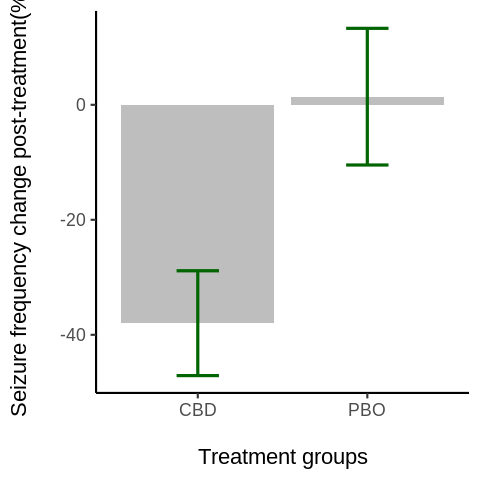

In [ ]:
%%R
# Enter your code below this comment
# this creates a bar graph with the difference in seizure frequency after
# treatment (PBO/CBD)

ggplot() +
  stat_summary (data=new_combined_data,
                aes (x=Treatment,
                     y=percentage_difference),
                fun="mean",
                fill="grey",
                geom="bar") +

  stat_summary (data=new_combined_data,
                aes (x=Treatment,
                     y=percentage_difference),
                fun.data="mean_cl_normal",
                geom="errorbar",
                width=0.25,
                color="darkgreen",
                linewidth=1.5) +
  # this adds dark green error bars to the bar graph plot and adds clearer
  # axis labels
  scale_y_continuous (name="Seizure frequency change post-treatment(%)\n") +
  scale_x_discrete (name="\nTreatment groups",
                    limits=c("CBD", "PBO")) +
  theme_classic (base_size=22)


<br><font color='red'> <u><b>Question</u></b>:<br> Provide a suitable caption for the graph you have just drawn.</font>

A bar chart plotting the treatment groups (cannabidiol-treated patients and placebo-treated patients) against the baseline age (age prior to treatment) of the participants. Error bars are shown in green. This clearly shows CBD-treated patients overall experienced a much larger difference in the weekly seizure frequency compared to their placebo counterparts.

<font color='blue'> <u><b>Coding Task</u></b>:<br> Graph a dot plot showing the change in the frequency of seizures per week per participant separated by treatment.</font>

[](#RemoveThisTextCell)
The average and its standard deviation for each group should also be shown and ensure that you have appropriate colours and titles.

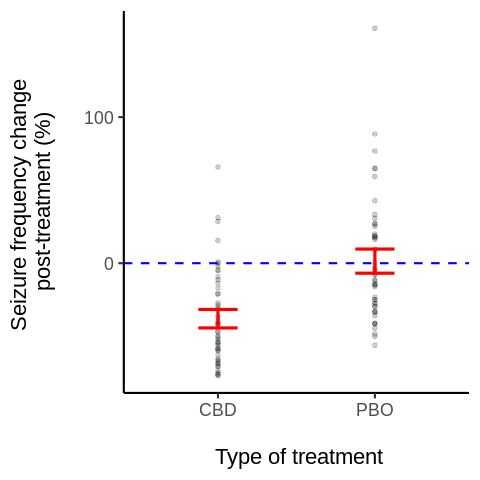

In [ ]:
%%R
# Enter your code below this comment
ggplot() +
  geom_point (data=new_combined_data_long,
                aes (x=Treatment,
                     y=percentage_difference),
                fun="mean",
                fill="grey",
                alpha=0.1,
                size=2) +
  # This is the dot graph showing the change in seizures per treatment
  # for each individual
  stat_summary (data=new_combined_data_long,
              aes (x=Treatment,
                   y=percentage_difference),
              fun.data="mean_cl_normal",
              geom="errorbar",
              width=0.25,
              color="red",
              linewidth=1.5,
              size=5) +
  # This adds dark green error bars to the bar graph plot
  scale_y_continuous (name="Seizure frequency change \npost-treatment (%)\n") + scale_x_discrete(name="\n Type of treatment",limits=c("CBD" , "PBO")) +
  theme_classic (base_size=22) +
  # This adds clearer axis labels


  geom_hline (aes (yintercept=0),
            color="blue",
            linetype="dashed",
            linewidth=1)
  # This adds a blue zero line to the graph




<br><font color='red'> <u><b>Question</u></b>:<br> Provide a suitable caption for the graph you have just drawn.</font>

A dot plot illustrating the type of treatment, cannabidiol-treated (CBD) and placebo (PBO), against the frequency of seizures in patients post-treatment. The error bars are in red and the zero line in blue. This plot shows the placebo group has an overall higher frequency of seizures post-treatment in comparison to the cannabidiol group.

<font color='blue'> <u><b>Coding Task</u></b>:<br> Draw a graph to clearly show the change in number of seizures per week that occured at baseline and following treatment per participant, separated for each treatment group.</font>

[](#RemoveThisTextCell)
The average and its standard deviation for each group should be shown and ensure that you have appropriate colours and titles.

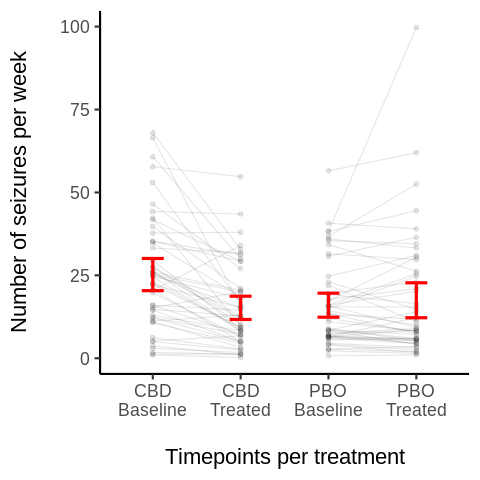

In [ ]:
%%R
# Enter your code below this comment
ggplot () +
  geom_point (data=new_combined_data_long,
              aes(x=interaction(Timepoint, Treatment),
                  y=value),
              color="black",
              alpha=0.1,
              size=2) +
  geom_line (data=new_combined_data_long,
             aes(x=interaction(Timepoint, Treatment),
                 y=value,
                 group=ID),
             color="black",
             alpha=0.1,
             linewidth=0.5) +
  # This is the dot graph showing the change in seizures per sex
  # for each individual
  stat_summary (data=new_combined_data_long,
                 aes(x=interaction(Timepoint, Treatment),
                      y=value),
                 fun.data="mean_cl_normal",
                 geom="errorbar",
                 width=0.25,
                 color="red",
                 linewidth=1.5) +
   # This adds dark green error bars to the bar graph plot
   scale_y_continuous (name="Number of seizures per week\n") +
   scale_x_discrete (limits=c("Baseline.CBD", "Post_Treatment.CBD",
                              "Baseline.PBO", "Post_Treatment.PBO"),
                     labels=c("CBD\nBaseline", "CBD\nTreated",
                              "PBO\nBaseline", "PBO\nTreated"),
                     name="\nTimepoints per treatment") +
   theme_classic (base_size=22)
   # This adds clearer axis labels





<br><font color='red'> <u><b>Question</u></b>:<br> In this text box, provide a suitable caption for the graph you have just drawn.</font>


A dot plot showing timepoints per treatment where this refers to the period of time when seizures are recorded (baseline meaning prior treatment, and also during treatment for both the cannabidiol (CBD) and placebo (PBO groups). The timepoints are plotted against the number of seizures per week for each individual. The error bars are shown in red and each individual plot are joined to their respective baseline/treated pair.

<br><font color='red'> <u><b>Question</u></b>:<br> Comparing the three graphs with each other, discuss the advantages and disadvantages of presenting the data in this manner.</font>

A key advantage of the first bar graph is that the overall conclusion of cannabidiol treatment greatly reducing the weekly frequency of seizures can be made. This is a conclusion made generally for all results together, whereas the other two graphs are dot plots showing individual plots which may be a disadvantage when looking for overall trends in data. The second graph (dot plot) allows us to conclude that there is a lower spread of the frequency of seizures in the CBD group compared to the placebo group, which cannot be seen in the first bar chart. The third graph highlights there are lots of differences in response to treatment between each individual data point, enabling better visualisation of our data and demosntrating the individual differences in variation.


###**Part 1b: Determing Effects and Statistical Significance**

####**Statistical Testing**

<font color='blue'> <u><b>Coding Task</u></b>:<br> Determine graphically whether the data for both groups shows a normal distribution.</font>

[](#RemoveThisTextCell)
This should be shown as graphs and should not involve a Shapiro-Wilks test or an equivalent statistical test.

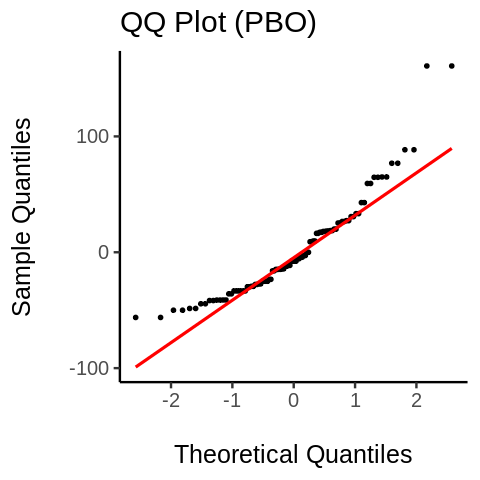

In [ ]:
%%R
# Enter your code below this comment
# this creates a QQ plot
ggplot() +
  stat_qq (data=subset(new_combined_data_long, Treatment == "PBO"),
           aes(sample=percentage_difference),
           color="black",
           size=2) +
  stat_qq_line (data=subset(new_combined_data_long, Treatment =="PBO"),
                aes(sample=percentage_difference),
                color="red",
                linewidth=1.5) +
  ggtitle       ("QQ Plot (PBO)") +
  scale_y_continuous (name="Sample Quantiles\n") +
  scale_x_continuous (name="\nTheoretical Quantiles") +
  theme_classic (base_size=25)

# PBO Group


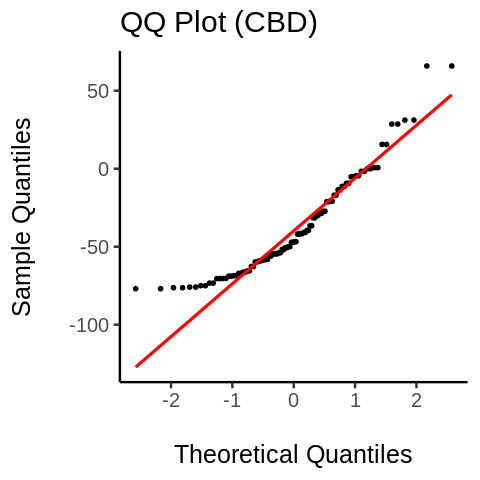

In [ ]:
%%R
# Enter your code below this comment
ggplot() +
  stat_qq (data=subset(new_combined_data_long, Treatment == "CBD"),
           aes(sample=percentage_difference),
           color="black",
           size=2) +
  stat_qq_line (data=subset(new_combined_data_long, Treatment =="CBD"),
                aes(sample=percentage_difference),
                color="red",
                linewidth=1.5) +
  ggtitle       ("QQ Plot (CBD)") +
  scale_y_continuous (name="Sample Quantiles\n") +
  scale_x_continuous (name="\nTheoretical Quantiles") +
  theme_classic (base_size=25)

# CBD Group


<br><font color='red'> <u><b>Question</b></u>:<br>
Provide a conclusion based on the graphs above about the normal distribution of the data, and why this is important for undertaking any statistical testing?</font>

The Q plots I have plotted demonstrate that the data might not be normally distributed since some of the values plotted do not follow in a straight manner as shown by the red line. The creation and analysis of the Q plots are essential since this determines whether we should use either a Wilcoxon rank sum test (for no normal distribution) or a parametric test (for normally distributed data).

<font color='blue'> <u><b>Coding Task</u></b>:<br> Influenced by your answer in the previous question, calculate whether there is statistical support for CBD treatment having an effect on the change in the frequency of seizures per week when compared to PBO treatment.</font>


In [ ]:
%%R
# Enter your code below this comment
# this runs a t test in order to see if CBD treated patients have a difference
# in seizure frequency compared to patients in the placebo group

difference.CBD <- filter(new_combined_data,
                         Treatment == "CBD")$percentage_difference
difference.PBO <- filter(new_combined_data,
                         Treatment == "PBO")$percentage_difference
wilcox_rank_sum_test <- wilcox.test (difference.CBD, difference.PBO,
                                     conf.int=T,
                                     paired=F,
                                     var.equal=F)
wilcox_rank_sum_test




	Wilcoxon rank sum test with continuity correction

data:  difference.CBD and difference.PBO
W = 520, p-value = 4.926e-07
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -49.04313 -24.78910
sample estimates:
difference in location 
             -36.36191 



<font color='blue'> <u><b>Coding Task</u></b>:<br> Present the results of your statistical test in a table with an appropriate title.</font>

[](#RemoveThisTextCell)
Use your candidate number as the study number and consider what variables should be included.

In [ ]:
%%R
# Enter your code below this comment
# this assigns the stats test results into a dataframe
stats_test_results <- data.frame ("Study" = "282230",
                                   "n" = 100,
                                   "Difference" = sprintf("%+06.2f",
                                                          -36.36191),
                                   "CI_95" = sprintf("[%+06.2f, %+06.2f]",
                                                    wilcox_rank_sum_test$
                                                     conf.int[1],
                                                    wilcox_rank_sum_test$
                                                     conf.int[2]))
# this creates a table of results

stats_test_results %>%
  kable ("rst",
         align="r",
         caption=cat("Table 2:Average difference and respective confidence
         intervals for the seizure frequency change in CBD vs PBO patients"
         ))%>% print ()







Table 2:Average difference and respective confidence 
         intervals for the seizure frequency change in CBD vs PBO patients

======  ===  ==========  ================
 Study    n  Difference             CI_95
======  ===  ==========  ================
282230  100      -36.36  [-49.04, -24.79]
======  ===  ==========  ================


<br><font color='red'> <u><b>Question</u></b>:<br> Stating the null hypothesis, what conclusion can be stated from the statistical test that you have undertaken?</font>

The null hypothesis asserts that there is no difference in seizure frequency during treatment between the cannabidiol-treated patients and the placebo group patients compared to prior treatment. Since our p value is miniscule, we can reject the null hypothesis and accept the alternative hypothesis that cannabidiol treatment shows statistically significant reduction in the percentage seizure frequency per week in patients compared to the control placebo group.

####**Contingency Table**

<font color='blue'> <u><b>Coding Task</u></b>:<br> Construct a contingency table of those that responded to the CBD and PBO treatment.</font>

[](#RemoveThisTextCell)
For this task, a responder is someone who had a decrease more than 50% in the frequency of seizures that they had after the treatment compared to baseline.

In [ ]:
%%R
# this shows the number of responders vs. those who gave no response to the
# CBD/PBO treatment
responders.PBO <- sum(difference.PBO <= -50)
responders.CBD <- sum(difference.CBD <= -50)
noresponse.PBO <- sum(difference.PBO > -50)
noresponse.CBD <- sum(difference.CBD > -50)

row_PBO <- c(responders.PBO, noresponse.PBO)
row_CBD <- c(responders.CBD, noresponse.CBD)
df.names.respond <-c("Cannabidiol (CBD)",
                     "Placebo (PBO)")
df.sim.respond <- data.frame (row_CBD, row_PBO)
# this prints the contingency table
df.sim.respond %>%
  t () %>%
  data.frame (row.names = df.names.respond) %>%
  kable ("rst",
         align="r",
         col.names=c("", "Responders (>=50% change)",
                     "Non-responders (<50% change)"),
                     caption=cat("Table 1: Contingency Table")) %>% print()


Table 1: Contingency Table

=================  =========================  ============================
\                  Responders (>=50% change)  Non-responders (<50% change)
=================  =========================  ============================
Cannabidiol (CBD)                         24                            26
Placebo (PBO)                              2                            48
=================  =========================  ============================


####**Odds Ratio**

<font color='blue'> <u><b>Coding Task</u></b>:<br> Calculate the odds ratio of a participant in the CBD group responding to treatment compared to someone in the the PBO control group.</font>

[](#RemoveThisTextCell)
The odds ratio is the ratio of responders-to-nonresponders in the drug treatment group relative to the same in the placebo control treatment.

In [ ]:
%%R
# odds ratio calculation
odds_ratio <-
 (responders.CBD / noresponse.CBD) / (responders.PBO / noresponse.PBO)

odds_ratio

[1] 22.15385


<br><font color='red'> <u><b>Question</u></b>:<br> What does this odds ratio represent in the context of this study and compare and contrast this to the raw percentage change average?</font>

The odds ratio is a very large number of 22.15385, suggesting there is a strong positive correlation between receiving cannabidiol (CBD) treatment and the reduction of seizure frequency. The raw percentage change average of -36.36191% also shows a great reduction in seizure frequency for CBD patients, further supporting the odds ratio. The odds ratio is prefered since it takes into account the relative ratios of response/non-response in the drug treatment versus placebo group. This gives us more accuracy when interpreting the results.

<font color='blue'> <u><b>Coding Task</u></b>:<br> Present the odds ratio with 95% confidence interval in a table with an appropriate title.</font>

[](#RemoveThisTextCell)
Use your candidate number as the study number and consider what variables should be included.

In [ ]:
%%R
# Convertion of the odds ratio onto a log ratio
logOR <- log(odds_ratio)
critical_value <- 1.96
ORCI.value <- critical_value * sqrt(1/responders.CBD + 1/noresponse.CBD)
upperORCI <- exp(logOR + ORCI.value) %>% print(.)
lowerORCI <- exp(logOR - ORCI.value) %>% print(.)

# This creates a table showing the critical value, the upper odds ratio
# confidence interval and the lower odds ratio confidence interval
odds_ratio_dataframe <- data.frame (odds_ratio, upperORCI, lowerORCI)
odds_ratio_dataframe %>%
 kable("simple",
        align = "r",
        caption=cat("Table 3:Odds ratio with upper and
        lower confidence intervals"))%>% print ()




[1] 38.58358
[1] 12.72025
Table 3:Odds ratio with upper and 
        lower confidence intervals

 odds_ratio   upperORCI   lowerORCI
-----------  ----------  ----------
   22.15385    38.58358    12.72025


<br><font color='red'> <u><b>Question</u></b>:<br> Based on all the analyses that you have done in Part 1, summarise the findings about the effect of CBD on the frequency of seizures?</font>

The creation of the QQ plots (which suggest no normally distributed data) and the subsequent Wilcoxon rank sum test led to the conclusion that the alternative hypothesis can be accepted (that CBD treatment shows a greater reduction in weekly seizure frequency compared to placebo). This is further supported by odds ratio which shows a strong correlation between CBD treatment and the reduction of seizure frequency. The bar chart shows that the CBD treated patients had a great reduction of seizure frequency, unlike placebo where there was a slight increase of seizure frequency on the whole. The first and dot plot shows a greater reduction in seizure frequency for the CBD group compareed to the placebo group.

Therefore, the bar chart and dot plots also support the main conclusion that there participants treated with cannabidiol have a much lower seizure frequency post-treatment compared to their placebo counterparts.

## Part 2: Meta-analysis of clinical trials

###**Assign the values for the variables**


[](#RemoveThisTextCell)
Run the code cell below to generate the list of variable names you are required to assign values to, and the blocks of text based on excerpts from 5 different clinical trial studies. Note that we have modified the data according to your candidate number. The data relates to primary and secondary endpoints for your meta-analysis in Part 2 of this assigment. The primary endpoint here happens to be a continuous outcome that describes the effect of 20 mg/kg CBD on <u>seizure frequency</u>, relative to a placebo control treatment. The secondary endpoint happens to be a categorical outcome that describes the effect of 20 mg/kg CBD <u>on the ratio of responders-to-nonresponders in the drug treatment group relative to the same in the placebo control treatment</u>. As for part 1, the definition of a 'responder' here is a participant that experiences greater than or equal to 50% reduction in seizure frequency.

In [ ]:
# @title ####**Run this python code cell to obtain the variable names and text with the data you need for Part 2** - <mark>Do <b><u>NOT</u></b> click '<tt>Show code</tt></mark>'
#RemoveCellOutputFromHTML
#RemoveCellInputFromHTML

#!!!!!!!!!!!!!!!!!!!!!! DO NOT EDIT THIS PYTHON CODE CELL !!!!!!!!!!!!!!!!!!!!!!
# You can see this code because you accidently clicked 'Show code' for this
# hidden cell. Hide it again by clicking the button in the top-left corner of
# this cell containing a down arrowhead symbol (⌄). (If you hover the mouse
# cursor over the button in question for a couple of seconds, a tool-tip will
# appear saying "Hide code".)

# Import required python modules
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
import ipywidgets as widgets # Loads the Widget framework.
import numpy as np

# Send candidate number to R
#robjects.r("cand_no <- {:d}".format(cand_no))

# Get python handles for R functions
r_rnorm    = robjects.r["rnorm"]
r_set_seed = robjects.r["set.seed"]
r_sample   = robjects.r["sample"]

# Set random seed according to candidate number
r_set_seed(cand_no)

# Calculate confidence intervals for primary endpoint
probs = (0.025,0.975)
ci1 = list (np.quantile (r_rnorm (1000, -22.8, 47.5 * (1 / 29 + 1 / 31)**0.5), probs))
ci2 = list (np.quantile (r_rnorm (1000, -25.7, 60.0 * (1 / 35 + 1 / 37)**0.5), probs))
ci3 = list (np.quantile (r_rnorm (1000, -18.8, 55.0 * (1 / 36 + 1 / 36)**0.5), probs))
ci4 = list (np.quantile (r_rnorm (1000, -21.1, 40.0 * (1 / 25 + 1 / 26)**0.5), probs))
ci5 = list (np.quantile (r_rnorm (1000, -30.1, 45.0 * (1 / 26 + 1 / 25)**0.5), probs))

# Comment out the following call to R to prevent creating variables
# in the student version of the assignment
#robjects.r('''
#ci.lo       <- c({0:.1f},{2:.1f},{4:.1f},{6:.1f},{8:.1f})
#ci.hi       <- c({1:.1f},{3:.1f},{5:.1f},{7:.1f},{9:.1f})
#'''.format(*(ci1+ci2+ci3+ci4+ci5)));

# Add jitter to 2x2 contingency tables for secondary endpoint
t2x2_1 = [None] * 4;
t2x2_1[0] = 13 + np.round(2 * r_rnorm (1)[0]); t2x2_1[1] = 31 - t2x2_1[0]
t2x2_1[2] =  7 + np.round(2 * r_rnorm (1)[0]); t2x2_1[3] = 29 - t2x2_1[2]
t2x2_2 = [None] * 4;
t2x2_2[0] = 18 + np.round(2 * r_rnorm (1)[0]); t2x2_2[1] = 37 - t2x2_2[0]
t2x2_2[2] =  9 + np.round(2 * r_rnorm (1)[0]); t2x2_2[3] = 35 - t2x2_2[2]
t2x2_3 = [None] * 4;
t2x2_3[0] = 13 + np.round(2 * r_rnorm (1)[0]); t2x2_3[1] = 36 - t2x2_3[0]
t2x2_3[2] =  6 + np.round(2 * r_rnorm (1)[0]); t2x2_3[3] = 36 - t2x2_3[2]
t2x2_4 = [None] * 4;
t2x2_4[0] = 11 + np.round(2 * r_rnorm (1)[0]); t2x2_4[1] = 26 - t2x2_4[0]
t2x2_4[2] =  7 + np.round(2 * r_rnorm (1)[0]); t2x2_4[3] = 25 - t2x2_4[2]
t2x2_5 = [None] * 4;
t2x2_5[0] =  9 + np.round(2 * r_rnorm (1)[0]); t2x2_5[1] = 25 - t2x2_5[0]
t2x2_5[2] =  5 + np.round(2 * r_rnorm (1)[0]); t2x2_5[3] = 26 - t2x2_5[2]

# Comment out the following call to R to prevent creating variables
# in the student version of the assignment
#robjects.r('''
#grp1yes <- c({0},{4},{8},{12},{16})
#grp1no  <- c({1},{5},{9},{13},{17})
#grp2yes <- c({2},{6},{10},{14},{18})
#grp2no  <- c({3},{7},{11},{15},{19})
#'''.format(*(t2x2_1+t2x2_2+t2x2_3+t2x2_4+t2x2_5)))

# Changing styling of output for this code cell
def change_style():
  from IPython.display import Javascript
  display(Javascript('''
  for (rule of document.styleSheets[0].cssRules){
    if (rule.selectorText=='body') {
      rule.style.fontSize = '16px'
      rule.style.lineHeight = '24px'
      break
    }
  }
  '''))
change_style()

# Print markdown
from IPython.display import display, Markdown

idx = []
[idx.append(r_sample(list(range(0,3,1)),1)[0][0]) for i in range(5)]
M0a = Markdown("""
###List of variable names and their definitions
* <mark><tt>{0:s}</tt></mark> : Study identifiers (in this case, clinical trial pseudo-IDs)
* <mark><tt>{1:s}</tt></mark> : The number of participants in the 20 mg/kg CBD group of each study
* <mark><tt>{2:s}</tt></mark> : The number of participants in the placebo (PBO) group of each study
* **Primary Endpoint**:
  1. <mark><tt>{3:s}</tt></mark> : The average difference in percentage points, or percentage change, in seizure frequency after treatment with 20 mg/kg cannabidiol treatment (CBD) vs placebo (PBO) in each study
  2. <mark><tt>{4:s}</tt></mark> : The lower bound of the 95% confidence interval for the above effect on seizure frequency in each study
  3. <mark><tt>{5:s}</tt></mark> : The upper bound of the 95% confidence interval for the above effect on seizure frequency in each study
* **Secondary Endpoint**
  1. <mark><tt>{6:s}</tt></mark> : The number of 20 mg/kg CBD treated patients with >= 50% reduction in seizure frequency in each study.
  2. <mark><tt>{7:s}</tt></mark> : The number of 20 mg/kg CBD treated patients with < 50% reduction in seizure frequency in each study.
  3. <mark><tt>{8:s}</tt></mark> : The number of placebo (PBO) treated patients with >= 50% reduction in seizure frequency in each study.
  4. <mark><tt>{9:s}</tt></mark> : The number of placebo (PBO) treated patients with < 50% reduction in seizure frequency in each study.
  """.format(("study","Study","STUDY")[idx[0]],
       ("N1","n1","grp1n")[idx[1]],
       ("N2","n2","grp2n")[idx[1]],
       ("b","B","beta")[idx[2]],
       ("CI.lower","ci_lo","ci.lo")[idx[3]],
       ("CI.upper","ci_hi","ci.hi")[idx[3]],
       ("grp1_yes","grp1yes","Grp1_Yes")[idx[4]],
       ("grp1_no","grp1no","Grp1_No")[idx[4]],
       ("grp2_yes","grp2yes","Grp2_Yes")[idx[4]],
       ("grp2_no","grp2no","Grp2_No")[idx[4]]))

M0b = Markdown("""
<br><font color='blue'> <u><b>Coding Task</u></b>:<br>
You will need to extract and/or calculate the numeric values that the above
variable descriptions correspond to from the information in the excerpts below
and assign them to the specified variable names. Importantly, since there are
five studies in this meta-analysis, each of the named variables you must assign
here are numeric vectors containing five elements, and the order of the elements
must match. For example, element 3 in the variable named <tt>{0:s}</tt> must be
\"#3\", and element 3 in the variable named <tt>{1:s}</tt> must correspond
to the number of participants in the placebo group specified in the excerpt for
study \"#3\". <u><b>Be very careful to extract and enter the data correctly and
check your work - mistakes made here will propagate to all subsequent steps of
your analysis.</b></u></font>
  """.format(("study","Study","STUDY")[idx[0]],
       ("N2","n2","grp2n")[idx[1]]))

M1 = Markdown("""
### List of study excerpts containing data for the primary and secondary endpoints
#### Study #1
> *...
In the 20 mg/kg cannabidiol (CBD) group (n = 31), the primary endpoint of
convulsive-seizure frequency decreased from a 12.3 seizures per month to 8.0,
representing a mean reduction of 35.0% from baseline. In the placebo (PBO) group
(n = 29), the mean monthly convulsive seizure frequency decreased from 14.8 to
13.0, representing a mean reduction of 12.2%. The adjusted mean difference in
convulsive seizures between the cannabidiol group and the placebo group was
-22.8 percentage points (95% confidence interval [CI], {:.1f} to {:.1f}).
... <br> ...
For the secondary endpoint, the proportion of patients with ≥50% reduction
in convulsive seizure frequency was {:.1f}% ({:.0f}/{:.0f}) with CBD versus
{:.1f}% ({:.0f}/{:.0f}) with placebo (odds ratio (OR) = {:.2f}).
...*
""".format(*ci1, 100*t2x2_1[0]/(t2x2_1[0]+t2x2_1[1]),t2x2_1[0],
           (t2x2_1[0]+t2x2_1[1]),100*t2x2_1[2]/(t2x2_1[2]+t2x2_1[3]),
           t2x2_1[2], (t2x2_1[2]+t2x2_1[3]),
           (t2x2_1[0]/t2x2_1[1])/(t2x2_1[2]/t2x2_1[3])))

M2 = Markdown("""
#### Study #2
> *...
The percentage reduction from baseline in convulsive seizure frequency during
the 12-week posttreatment period was 45.7% for the 20 mg/kg cannabidiol (CBD)
group (n = 37), and 26.9% for the placebo group (n = 35). The percentage change from
placebo was -25.7% (95% CI: [{:.1f}%, {:.1f}%]) for the CBD group.
... <br> ...
The endpoint of a reduction in convulsive-seizure frequency by 50% or more
during the treatment period occurred in {:.1f}% ({:.0f}/{:.0f}) of the patients
in the 20 mg/kg CBD group and in {:.1f}% ({:.0f}/{:.0f}) of the patients in the
placebo group (OR = {:.2f}).
...*
""".format(*ci2, 100*t2x2_2[0]/(t2x2_2[0]+t2x2_2[1]), t2x2_2[0],
          (t2x2_2[0]+t2x2_2[1]), 100*t2x2_2[2]/(t2x2_2[2]+t2x2_2[3]),
           t2x2_2[2],(t2x2_2[2]+t2x2_2[3]),
          (t2x2_2[0]/t2x2_2[1])/(t2x2_2[2]/t2x2_2[3])))

M3 = Markdown("""
#### Study #3
> *...
The mean percent reduction from baseline in the frequency of total seizures per
28 days during the treatment period was 38.4% in the 20 mg/kg cannabidiol group
(n = 36), 39.1% in the 10 mg/kg cannabidiol group (n = 33), and 19.6% in the placebo
group (n = 36). The estimated mean difference in reduction between the 20 mg/kg
cannabidiol group and the placebo group was 18.8 percentage points (95%
confidence interval [CI], {:.1f} to {:.1f}), and the estimated mean difference
in reduction between the 10 mg/kg cannabidiol group and the placebo group was 19.5
percentage points (95% CI, -1.5 to 40.4).
... <br> ...
During the treatment period, a total of {:.0f} patients in the 20 mg/kg cannabidiol
group, 13 patients in the 10 mg/kg cannabidiol group, and {:.0f} patients in the
placebo group had at least a 50% reduction from their baseline in seizure
frequency (odds ratio = {:.2f}).
...*
""".format(*[ci3[np.abs(i-1)] * -1 for i in range(2)], t2x2_3[0], t2x2_3[2],
           (t2x2_3[0]/t2x2_3[1])/(t2x2_3[2]/t2x2_3[3])))

M4 = Markdown("""
#### Study #4
> *...
In the 20 mg/kg cannabidiol group (n = 26), the monthly frequency of total seizures
was lower by a mean of 36.4% after starting treatment compared to the baseline period.
In the placebo group (n = 25), the monthly frequency of seizures was lower during
treatment by a mean of 15.3% compared to baseline. The estimated mean difference
between the treatment groups was -21.1% (95% CI {:.1f} to {:.1f}).
... <br> ...
The analysis of seizure frequency was followed up by examining the secondary
endpoint. {:.0f} of {:.0f} patients in the cannabidiol group had a reduction in
total seizure frequency of 50% or more from baseline during the treatment period
compared with {:.0f} of {:.0f} patients in the placebo group (OR = {:.2f}).
...*
""".format(*ci4, t2x2_4[0],(t2x2_4[0]+t2x2_4[1]),
           t2x2_4[2],(t2x2_4[2]+t2x2_4[3]),
           (t2x2_4[0]/t2x2_4[1])/(t2x2_4[2]/t2x2_4[3])))

M5 = Markdown("""
#### Study #5
> *...
A reduction from baseline in primary-end-point seizures of 48.6% was observed
for the 20 mg/kg cannabidiol group (CBD20, n = 25), 47.5% for the 40 mg/kg cannabidiol
group (CBD40, n = 23), and 26.5% for the placebo group (n = 26). The percentage
reduction from placebo was 30.1% (95% CI: [{:.1f}%, {:.1f}%]) for the CBD20
group, and 28.5% (95% CI: [2.9%, 62.0%]) for the CBD40 group.
... <br> ...
For the secondary endpoint, seizures were reduced at least 50% from baseline
during the treatment period in {:.0f} of {:.0f} patients in the CBD20 group,
10 of 23 patients in the CBD40 group, and {:.0f} of {:.0f} patients in the
placebo group (OR = {:.2f}).
...*
""".format(*[ci5[np.abs(i-1)] * -1 for i in range(2)], t2x2_5[0],
            (t2x2_5[0]+t2x2_5[1]), t2x2_5[2],(t2x2_5[2]+t2x2_5[3]),
            (t2x2_5[0]/t2x2_5[1])/(t2x2_5[2]/t2x2_5[3])))

display(M0a,M0b,M1,M2,M3,M4,M5)

!pip install markdown2 >/dev/null
from IPython.display import Markdown
import tempfile
import markdown2
concatenated_md = M0a.data + M0b.data + M1.data + M2.data + M3.data + M4.data + M5.data
html_output = markdown2.markdown(concatenated_md)

# Create a temporary HTML file
with open('studyinfo.html', 'w') as f:
  f.write(f"<html><body>{html_output}</body></html>")
  file_path = f.name

# Instruct the user to download and open the file (Colab doesn't allow direct opening)
print(f"""
We suggest that you download and open the HTML of the output generated:

{file_path}

You may need to click the 'Refresh' button in the 'Files' pane on the
left side to see the newly generated file.

In the subsequent activities, you will need to extract information from
this output and enter the study data into the code cell below. You may
find it easier to do this then if you open the HTML that you download
in a separate browser window and/or print it.

""")

<IPython.core.display.Javascript object>


###List of variable names and their definitions
* <mark><tt>Study</tt></mark> : Study identifiers (in this case, clinical trial pseudo-IDs)
* <mark><tt>N1</tt></mark> : The number of participants in the 20 mg/kg CBD group of each study
* <mark><tt>N2</tt></mark> : The number of participants in the placebo (PBO) group of each study
* **Primary Endpoint**:
  1. <mark><tt>B</tt></mark> : The average difference in percentage points, or percentage change, in seizure frequency after treatment with 20 mg/kg cannabidiol treatment (CBD) vs placebo (PBO) in each study
  2. <mark><tt>ci.lo</tt></mark> : The lower bound of the 95% confidence interval for the above effect on seizure frequency in each study
  3. <mark><tt>ci.hi</tt></mark> : The upper bound of the 95% confidence interval for the above effect on seizure frequency in each study
* **Secondary Endpoint**
  1. <mark><tt>grp1_yes</tt></mark> : The number of 20 mg/kg CBD treated patients with >= 50% reduction in seizure frequency in each study.
  2. <mark><tt>grp1_no</tt></mark> : The number of 20 mg/kg CBD treated patients with < 50% reduction in seizure frequency in each study.
  3. <mark><tt>grp2_yes</tt></mark> : The number of placebo (PBO) treated patients with >= 50% reduction in seizure frequency in each study.
  4. <mark><tt>grp2_no</tt></mark> : The number of placebo (PBO) treated patients with < 50% reduction in seizure frequency in each study.
  


<br><font color='blue'> <u><b>Coding Task</u></b>:<br>
You will need to extract and/or calculate the numeric values that the above
variable descriptions correspond to from the information in the excerpts below
and assign them to the specified variable names. Importantly, since there are
five studies in this meta-analysis, each of the named variables you must assign
here are numeric vectors containing five elements, and the order of the elements
must match. For example, element 3 in the variable named <tt>Study</tt> must be
"#3", and element 3 in the variable named <tt>N2</tt> must correspond
to the number of participants in the placebo group specified in the excerpt for
study "#3". <u><b>Be very careful to extract and enter the data correctly and
check your work - mistakes made here will propagate to all subsequent steps of
your analysis.</b></u></font>
  


### List of study excerpts containing data for the primary and secondary endpoints
#### Study #1
> *...
In the 20 mg/kg cannabidiol (CBD) group (n = 31), the primary endpoint of
convulsive-seizure frequency decreased from a 12.3 seizures per month to 8.0,
representing a mean reduction of 35.0% from baseline. In the placebo (PBO) group
(n = 29), the mean monthly convulsive seizure frequency decreased from 14.8 to
13.0, representing a mean reduction of 12.2%. The adjusted mean difference in
convulsive seizures between the cannabidiol group and the placebo group was
-22.8 percentage points (95% confidence interval [CI], -45.3 to 0.5).
... <br> ...
For the secondary endpoint, the proportion of patients with ≥50% reduction
in convulsive seizure frequency was 45.2% (14/31) with CBD versus
31.0% (9/29) with placebo (odds ratio (OR) = 1.83).
...*



#### Study #2
> *...
The percentage reduction from baseline in convulsive seizure frequency during
the 12-week posttreatment period was 45.7% for the 20 mg/kg cannabidiol (CBD)
group (n = 37), and 26.9% for the placebo group (n = 35). The percentage change from
placebo was -25.7% (95% CI: [-54.9%, -0.2%]) for the CBD group.
... <br> ...
The endpoint of a reduction in convulsive-seizure frequency by 50% or more
during the treatment period occurred in 48.6% (18/37) of the patients
in the 20 mg/kg CBD group and in 25.7% (9/35) of the patients in the
placebo group (OR = 2.74).
...*



#### Study #3
> *...
The mean percent reduction from baseline in the frequency of total seizures per
28 days during the treatment period was 38.4% in the 20 mg/kg cannabidiol group
(n = 36), 39.1% in the 10 mg/kg cannabidiol group (n = 33), and 19.6% in the placebo
group (n = 36). The estimated mean difference in reduction between the 20 mg/kg
cannabidiol group and the placebo group was 18.8 percentage points (95%
confidence interval [CI], -6.0 to 45.2), and the estimated mean difference
in reduction between the 10 mg/kg cannabidiol group and the placebo group was 19.5
percentage points (95% CI, -1.5 to 40.4).
... <br> ...
During the treatment period, a total of 14 patients in the 20 mg/kg cannabidiol
group, 13 patients in the 10 mg/kg cannabidiol group, and 4 patients in the
placebo group had at least a 50% reduction from their baseline in seizure
frequency (odds ratio = 5.09).
...*



#### Study #4
> *...
In the 20 mg/kg cannabidiol group (n = 26), the monthly frequency of total seizures
was lower by a mean of 36.4% after starting treatment compared to the baseline period.
In the placebo group (n = 25), the monthly frequency of seizures was lower during
treatment by a mean of 15.3% compared to baseline. The estimated mean difference
between the treatment groups was -21.1% (95% CI -43.6 to 1.6).
... <br> ...
The analysis of seizure frequency was followed up by examining the secondary
endpoint. 8 of 26 patients in the cannabidiol group had a reduction in
total seizure frequency of 50% or more from baseline during the treatment period
compared with 7 of 25 patients in the placebo group (OR = 1.14).
...*



#### Study #5
> *...
A reduction from baseline in primary-end-point seizures of 48.6% was observed
for the 20 mg/kg cannabidiol group (CBD20, n = 25), 47.5% for the 40 mg/kg cannabidiol
group (CBD40, n = 23), and 26.5% for the placebo group (n = 26). The percentage
reduction from placebo was 30.1% (95% CI: [3.3%, 52.9%]) for the CBD20
group, and 28.5% (95% CI: [2.9%, 62.0%]) for the CBD40 group.
... <br> ...
For the secondary endpoint, seizures were reduced at least 50% from baseline
during the treatment period in 11 of 25 patients in the CBD20 group,
10 of 23 patients in the CBD40 group, and 8 of 26 patients in the
placebo group (OR = 1.77).
...*



We suggest that you download and open the HTML of the output generated:

studyinfo.html

You may need to click the 'Refresh' button in the 'Files' pane on the
left side to see the newly generated file.

In the subsequent activities, you will need to extract information from
this output and enter the study data into the code cell below. You may
find it easier to do this then if you open the HTML that you download
in a separate browser window and/or print it.




You will now be able to see the variables created in R in the [table in the widget near the top of this page](#scrollTo=yyFW4sa0giJN&line=1&uniqifier=1).

In [ ]:
%%R
# assigns each study number to a variable
Study <- c("#1", "#2", "#3", "#4", "#5")


#This shows the number of patients treated with CBD
N1 <- c(31, 37, 36, 26, 25)

#This shows the number of patients in the control placebo group
N2 <- c(29, 35, 36, 25, 25)

# for the primary endpoint
#This shows the mean difference for the % change in the frequency of seizure
#post CBD treatment compared to the placebo group
B <- c(-22.8, -45.7, -18.8, -21.1, -30.1)

#This shows the 95% confidence interval lower bound value for its impact on
#the frequency of seizures
ci.lo <- c(-45.3, -54.9, -45.2, -43.6, -52.9)

#This shows the 95% confidence interval upper bound value for its impact on
#the frequency of seizures
ci.hi <- c(-0.5, -0.2, -6, -1.6, -3.3)

# for the secondary endpoint
#This shows how many participants in the CBD group had >=50% reduced frequency
#of seizures
grp1yes <- c(14, 18, 14, 8, 11)

#This shows how many participants in the CBD group had <50% reduced frequency of
#seizures
grp1no <- c(17, 19, 22, 18, 14)

#This shows how many participants in the PBO group had >=50% reduced frequency
#of seizures
grp2yes <- c(9, 9, 4, 7, 8)

#This shows how many participants in the PBO group had <50% reduced frequency of
#seizures
grp2no <- c(20, 26, 32, 18, 18)





### **Part 2a: Meta-analysis of a continuous outcome**

####**Raw effect sizes for the continuous outcome**

<font color='blue'> <u><b>Coding Task</b></u>:<br> Calculate the values of, and print a table reporting the following variables (columns) for each study (row):</font>
<ul>
<font color='blue'>
  <li><tt><mark>Study</mark></tt> : The study identifier. You assigned this variable already in the previous task.</li>
  <li><tt><mark>n</mark></tt> : The total number of participants in each study.</li>
  <li>The raw effect size, being the difference in percentage points, or percentage change, in seizure frequency after treatment with CBD vs placebo. You assigned this already and it will be called either <tt><mark>b</mark></tt>, <tt><mark>B</mark></tt> or <tt><mark>beta</mark></tt> depending on your candidate number.</li>
  <li><tt><mark>CI_95</mark></tt> : The 95% confidence interval reported for the raw effect size. You assigned the variables for the confidence interval limits in the previous task and their names will vary depending on your candidate number. For the lower limit they will be called either <tt><mark>CI.lower</mark></tt>, <tt><mark>ci_lo</tt></mark> or <tt><mark>ci.lo</tt></mark>. For the upper limit they will be called either <tt><mark>CI.upper</mark></tt>, <tt><mark>ci_hi</tt></mark> or <tt><mark>ci.hi</tt></mark>. The table entries for <tt><mark>CI_95</mark></tt> should be formatted consistent with APA style, in square brackets and separated by a comma. For example: [<tt><mark>CI.lower</mark></tt>, <tt><mark>CI.upper</tt>]</li>.
</font>
</ul>



In [ ]:
%%R
# this shows the total number of participants in both studies
n <- N1 + N2
print(n)

# This creates a table showing all the results for each study
raw_effect_sizes <- data.frame(Study, n, B)
raw_effect_sizes%>%
  mutate (.,
          "CI_95" = sprintf ("[%+.2f, %+.2f]", ci.lo, ci.hi)) %>%
  select (.,
          Study, n, B, CI_95) %>%
  kable("simple",
        align = "r",
        digits=c(5,0))


[1] 60 72 72 51 50


 Study    n       B             CI_95
------  ---  ------  ----------------
    #1   60   -22.8   [-45.30, -0.50]
    #2   72   -45.7   [-54.90, -0.20]
    #3   72   -18.8   [-45.20, -6.00]
    #4   51   -21.1   [-43.60, -1.60]
    #5   50   -30.1   [-52.90, -3.30]


<br><font color='red'> <u><b>Question</b></u>:<br> Which (if any) of the above studies do you think independently reports a statistically significant difference in percentage change in seizure frequency between the CBD and placebo treatments at a 5% significance threshold (i.e. p < 0.05)? How can you tell?</font>

Studies 1 to 5 all show statistically significant (at p<0.05) % change in the frequency of seizures since all these studies do not have zero for the 95% confidence intervals.


####**Obtaining the standard deviations for the raw effect sizes**

<font color='blue'> <u><b>Coding Task</b></u>:<br> Calculate the pooled standard deviation (<tt><mark>SD.Pooled</mark></tt>) for each effect sizes and print a table reporting the following variables (columns) for each study (row):</font>
<ul>
<font color='blue'>
  <li><tt><mark>Study</mark></tt>: The study identifier.</li>
  <li>The raw effect size, being the difference in percentage points, or percentage change, in seizure frequency after treatment with CBD vs placebo. You assigned this already and it will be called either <tt><mark>b</mark></tt>, <tt><mark>B</mark></tt> or <tt><mark>beta</mark></tt> depending on your candidate number.</li>
  <li><tt><mark>SD.Pooled</mark></tt>: The computed pooled standard deviation for the raw effect size.</li>
  <li>The number of participants in the 20 mg/kg CBD group. You assigned this already and it will be called either <mark><tt>N1</tt></mark>, <mark><tt>n1</tt></mark> or <mark><tt>grp1n</tt></mark> depending on your candidate number</li>
  <li>The number of participants in the placebo (PBO) group. You assigned this already and it will be called either <mark><tt>N2</tt></mark>, <mark><tt>n2</tt></mark> or <mark><tt>grp2n</tt></mark> depending on your candidate number</li>
</font>
</ul>

[](#RemoveThisTextCell)
Your answer must use the following information to compute the pooled standard deviation, <tt>SD.Pooled</tt>:
<ul>
  <li>A standard deviation that pools the variability from the CBD and placebo groups, <tt>SD.Pooled</tt>, can be calculated using the following equation: $$SD_{Pooled} = \frac{SE_{Pooled}}{\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}$$<br>
Note that <i>n<sub>1</sub></i> in the above equation will correspond to either <tt>N1</tt>, <tt>n1</tt> or <tt>grp1n</tt> in your coding assignment depending on your candidate number. Similarly, <i>n2<sub>2</sub></i> will correspond to either <tt>N2</tt>, <tt>n2</tt> or <tt>grp2n</tt>.</li>
  <li>Where the pooled standard error (<tt>SE.Pooled</tt>) can be estimated from the lower and upper limits of a 95% confidence interval using the following equation:
$$SE_{Pooled} = \frac{(CI_{Upper} - CI_{Lower})}{(2 \cdot z\_crit)}$$<br>
Note that <i>CI<sub>Upper</sub></i> in the above equation will correspond to either <tt>CI.lower</tt>, <tt>ci_lo</tt> or <tt>ci.lo</tt> in your coding assignment depending on your candidate number. Similarly, <i>CI<sub>Lower</sub></i> will correspond to either <tt>CI.upper</tt>, <tt>ci_hi</tt> or <tt>ci.hi</tt>.</li>
  <li>Assume that intervals that you are converting were constructed with a critical value (<tt>z_crit</tt>) of 1.96 (i.e. corresponding to 2.5% tail probabilities in a standard normal <i>z</i>-distribution).</li>
</ul>

In [ ]:
%%R
# calculation of pooled standard deviation and pooled standard error
z_crit <- 1.96
SE.Pooled <- (ci.hi-ci.lo)/(2 * z_crit)
SD.Pooled <- (SE.Pooled / sqrt(1/N1 + 1/N2)) %>% print (.)


[1] 44.23807 59.17931 42.42641 38.25030 44.73533


<br><font color='red'> <u><b>Question</b></u>:<br> Explain in words how a standard deviation for the continuous outcome was calculated from the 95% confidence intervals? Use the formula for the denominator in the calculation of Student's t-statistic for a two-sample test to support your answer: https://tinyurl.com/yc4t3txf. </font>


The pooled standard deviation is equal to the value of the upper confidence 95% interval minus the lower confidence interval divided by two times the z critical value. The standard error uses the 95% confidence intervals to calculate the pooled standard deviation. The denominator of the t test statistic is equal to the pooled standard error. Thia also shows how the standard pooled error uses the 95% confidence intervals to calculate the pooled standard deivation.


####**Calculating standardized effect sizes from the mean difference, standard deviation and sample sizes**

<font color='blue'> <u><b>Coding Task</b></u>:<br> Convert each of the above raw effect sizes for the <u><b>primary</b></u> endpoint into a <b>Pearson's correlation coefficient</b> and it's associated standard error (SE) and 95% confidence interval (CI). Ensure that you assign the estimates of the correlation coefficients of the studies to a variable called <tt><mark>r</mark></tt>, which should be numeric vector containing five elements - you will use it later. Print a table reporting the following variables (columns) for each study (row):</font>
<ul>
<font color='blue'>
  <li><tt><mark>Study</mark></tt>: The study identifier.</li>
  <li><tt><mark>n</mark></tt>: The total number of participants in the study.</li>
  <li><tt><mark>r</mark></tt>: The effect size for the <b><u>primary</u></b> endpoint, standardized and represented specifically as the correlation coefficient.</li>
  <li><tt><mark>SE</mark></tt>: The standard error of the study's correlation coefficient</tt>.</li>
  <tt><mark>CI_95</mark></tt>: The confidence interval for the correlation coefficient. The table entries for <tt><mark>CI_95</mark></tt> should be formatted consistent with APA style, in square brackets and separated by a comma. For example: [<tt><mark>ci.lo</mark></tt>, <tt><mark>ci.hi</tt>].</li>
</font>
</ul>

Your answer must use the <tt>esc_B</tt> function from the <tt>esc</tt> package. <i>Hint</i>: The <tt>combine_esc</tt> function from the <esc> package can be used to combine information from multiple effect size calculations into a single data frame.


In [ ]:
%%R

# Convertion of effect sizes to the correlation coefficient
primary_es1 <- esc_B (B[1], SD.Pooled[1], N1[1], N2[1], "r", Study[1])
primary_es2 <- esc_B (B[2], SD.Pooled[2], N1[2], N2[2], "r", Study[2])
primary_es3 <- esc_B (B[3], SD.Pooled[3], N1[3], N2[3], "r", Study[3])
primary_es4 <- esc_B (B[4], SD.Pooled[4], N1[4], N2[4], "r", Study[4])
primary_es5 <- esc_B (B[5], SD.Pooled[5], N1[5], N2[5], "r", Study[5])




# Creates a data frame with all effect sizes
primary_table <- combine_esc (primary_es1, primary_es2, primary_es3,
                              primary_es4, primary_es5) %>% print (.)

# Results table creation
primary_table %>%
  mutate (.,
          "CI_95" = sprintf ("[%+.2f, %+.2f]", ci.lo, ci.hi)) %>%
  select (.,
          "Study" = study, "n" = sample.size, "r" = es, "SE" = se, CI_95
         ) %>%
  kable (.,
         "simple",
         align = "r",
         digits = c(7,0))

  study         es   weight sample.size        se        var      ci.lo
1    #1 -0.2556490 58.97307          60 0.1302186 0.01695689 -0.4751269
2    #2 -0.3840446 67.26762          72 0.1219262 0.01486599 -0.5674586
3    #3 -0.2201466 71.21195          72 0.1185014 0.01404259 -0.4268746
4    #4 -0.2734064 50.01984          51 0.1413933 0.01999207 -0.5062448
5    #5 -0.3337444 48.05114          50 0.1442607 0.02081116 -0.5579020
         ci.hi  fishers.z    ci.lo.z      ci.hi.z measure
1 -0.006223664 -0.2614476 -0.5166714 -0.006223745       r
2 -0.164321083 -0.4047954 -0.6437663 -0.165824483       r
3  0.008448181 -0.2238101 -0.4560687  0.008448382       r
4 -0.003415952 -0.2805418 -0.5576676 -0.003415965       r
5 -0.064201768 -0.3470361 -0.6297819 -0.064290197       r


 Study    n            r   SE            CI_95
------  ---  -----------  ---  ---------------
    #1   60   -0.2556490    0   [-0.48, -0.01]
    #2   72   -0.3840446    0   [-0.57, -0.16]
    #3   72   -0.2201466    0 

<br><font color='red'> <u><b>Question</b></u>:<br> Using the convention established by Cohen for Pearson's correlation coefficient, classify each of the above standardized effect sizes as small, medium or large?</font>


Study 1:small
Study 2:medium
Study 3:small
Study 4:small
Study 5:medium


####**Meta-analysis: Calculation of overall effect size** - Confidence intervals using the *z*-statistic critical value.


<font color='blue'> <u><b>Coding Task</b></u>:<br> Perform all the calculations to run a meta-analysis using the method of Hunter & Schmidt for the <u><b>primary</b></u> endpoint. The variables computed must include the number of studies (<tt><mark>k</mark></tt>), the weighted mean correlation coefficient (<tt><mark>mean_r</mark></tt>) and it's corresponding variance (<tt><mark>var_r</mark></tt>), standard error (<tt><mark>se_r<mark></tt>), and lower and upper limits of 95% confidence intervals (<tt><mark>CI_Lower</mark></tt> and <tt><mark>CI_Upper</mark></tt>) using the critical value (<tt><mark>z_crit</mark></tt>) calculated from the <u>standard normal <i>z</i>-distribution</u>. Print a table with a reporting the following variables (columns) for the overall effect size (1 row):</font>
<ul>
<font color='blue'>
  <li><tt><mark>k</mark></tt>: The number of studies.</li>
  <li><tt><mark>N</v></tt>: The sum of participants from all studies.</li>
  <li><tt><mark>mean_r</mark></tt>: The overall standardized effect size (weighted-mean correlation coefficient) for the primary endpoint.</li>
  <li><tt><mark>mean_se</mark></tt>: The standard error the weighted-mean correlation coefficient.</li>
  <li><tt><mark>z_crit</mark></tt>: The critical value from the standard normal <i>z</i>-distribution.</li>
  <li><tt><mark>CI_95</mark></tt>: The 95% confidence interval of the weighted-mean correlation coefficient. The table entries for <tt><mark>CI_95</mark></tt> should be formatted consistent with APA style, in square brackets and separated by a comma. For example: [<tt><mark>CI_Lower</mark></tt>, <tt><mark>CI_Upper</tt>].</li>
</font>
</ul>

[](#RemoveThisTextCell)
Your answer must use the following information to perform it's calculations:
<ul>
  <li>The weighted mean, <tt>mean_r</tt>, can be calculated using the following formula:
$$mean\_r = \frac{\sum_{i=1}^k{n_i \cdot r_i}}{\sum_{i=1}^k{n_i}}$$<br>  </li>
  <li>The weighted variance, <tt>var_r</tt>, can be calculated using an almost identical equation, except you replace <tt>r</tt> with <tt>(r-mean_r)<sup>2</sup></tt>, as shown below:
$$var\_r = \frac{\sum_{i=1}^k{n_i \cdot (r_i - mean\_r)^2}}{\sum_{i=1}^k{n_i}}$$<br>
Since the equations for <tt>mean_r</tt> and <tt>var_r</tt> have similar form, you are expected to define an function that can be used to calculate either depending on the input argument(s) provided.  </li>
  <li>The standard error, <tt>se_r</tt>, can be calculated using the following formula:
$$se\_r = \sqrt{ \frac{var\_r}{k} }$$<br>  </li>
  <li>The confidence interval limits for <tt>mean_r</tt> can be calculated by normal theory using the following formula:
$$ CI\_Lower =  mean\_r -  se\_r \cdot z\_crit $$
$$ CI\_Upper =  mean\_r +  se\_r \cdot z\_crit $$<br>  </li>
  <li>The critical value of the <i>z</i>-statistic used for calculating confidence intervals should be 1.96, for a 95% confidence interval<sup>*</sup>.  </li>
</ul>
<sup>*</sup> Want to know more? The critical value of the <i>z</i>-test statistic (which follows a standard normal distribution, with mean = 0 and variance = 1) for any <tt>X</tt>% confidence interval can be obtained using the command: <tt>qnorm (1 - (1 - X/100)/2, lower.tail=TRUE)</tt>.


In [ ]:
%%R
# this calculates the number of studies and the sum of participants across
# all studies
r <- primary_table$es %>% print(.)
n <- primary_table$sample.size %>% print(.)
k <- length(r) %>% print(.)
N <- sum(n) %>% print(.)

# frequency weighted mean correlation coefficient calculation
mean_r <- weighted.mean(r, n) %>% print(.)

# variance calculation of the weighted mean correlation coefficient
var_r <- weighted.mean((r - mean_r)^2, n) %>% print(.)

# standard error calculation of the weighted mean correlation coefficient
se_r <- sqrt(var_r/k) %>% print(.)

# 95% confidence intervals calculation
X <- 95
z_crit <- qnorm ((1 - X/100)/2, lower.tail=FALSE) %>% print (.)
initial_CI_Lower <- (mean_r - se_r*z_crit) %>% print(.)
initial_CI_Upper <- (mean_r + se_r*z_crit) %>% print(.)

t_crit <-qt ((1 - 0.95)/2, k-1, lower.tail=FALSE) %>% print(.)

CI_Lower <- (mean_r - se_r*t_crit) %>% print(.)
CI_Upper <- (mean_r + se_r*t_crit) %>% print(.)

# Creation of primary results dataframe
primary_results_dataframe <- data.frame(k,N, mean_r, "mean_se" = se_r, z_crit)
# Summary table of overall effect size results with confidence intervals
primary_results_dataframe %>%
  mutate (.,
          "CI_95" = sprintf ("[%+.2f, %+.2f]", CI_Lower, CI_Upper)) %>%
  kable (.,
         "simple",
         align = "r")










[1] -0.2556490 -0.3840446 -0.2201466 -0.2734064 -0.3337444
[1] 60 72 72 51 50
[1] 5
[1] 305
[1] -0.2933497
[1] 0.003820389
[1] 0.02764196
[1] 1.959964
[1] -0.3475269
[1] -0.2391724
[1] 2.776445
[1] -0.370096
[1] -0.2166033


  k     N       mean_r    mean_se     z_crit            CI_95
---  ----  -----------  ---------  ---------  ---------------
  5   305   -0.2933497   0.027642   1.959964   [-0.37, -0.22]


<br><font color='red'> <u><b>Question</b></u>:<br>How would you classify this average effect size according to Cohen's convention? Comment on the uncertainty of the overall effect size estimate compared to our uncertainty of the estimates obtained from the individual studies.</font>

The average effect size is small when using Cohen's convention since it is just under 0.30 (but very close to medium). The confidence interval for the overall effect size estimate however has a relative large range from -0.37 to -0.22 and so there is quite a bit of uncertainty regarding this value. However, looking at individual studies would show greater uncertainty for each study since there is increased precision. Also, the differences between the procedure of each study would not have been accounted for, resulting in more variability and this would be unrepresentative of the initial population.


####**Meta-analysis: Checking for homogeneity of effect sizes** - Method using a hypothesis test

<font color='blue'> <u><b>Coding Task</b></u>:<br> Calculate the chi-squared statistic (Q) and the *p*-value for a test of homogeneity of population effect sizes for the <u><b>primary</b></u> endpoint and print a table reporting the following statistics (columns) for the hypothesis test (1 row):</font>
<ul>
<font color='blue'>
  <li><tt><b>Q</b></tt>: The <i>χ</i><sup> 2</sup> statistic for Cochran's Q test of homogeneity across the population effect sizes.</li>
  <li><tt><b>df</b></tt>: The number used for the degrees of freedom in the calculation of the <i>p</i>-value.</li>
  <li><tt><b>p_val</b></tt>: The <i>p</i>-value obtained by evaluating the <tt>Q</tt> statistic using the distribution function (<tt>pchisq</tt>) for <i>χ</i><sup> 2</sup> under the null hypothesis with <tt>k — 1</tt>  degrees of freedom.</li>
</font>
</ul>

[](#RemoveThisTextCell)
Your answer must use the following information to compute the <tt>Q</tt> statistic:
<ul>
  <li>A chi-squared statistic (Q) with <tt>k — 1</tt> degrees of freedom is equal to the sum over k number of <i>z</i>-test statistics, i.e. $$Q_{k-1} = \sum_{i=1}^k z_i^2$$  </li>
  <li>Where in the context of your meta-analysis, the value of <tt>z</tt> for the <i>i</i><sup> th</sup> out of the <tt>k</tt> number of studies uses the weighted estimate of the population mean that you calculated, <tt>mean_r</tt>, as follows:
$$z_i = \frac{(r_i - mean\_r)}{se_i}$$<br>  </li>
  <li>And where <tt>se</tt> is calculated using <tt>mean_r</tt> and weighted according to the number participants in each study, <tt>n</tt>, as follows using the formula:
$$se_i = \frac{(1 - mean\_r^2)}{\sqrt{(n_i - 1)}}$$</li>
</ul>

In [ ]:
%%R
# this calculates hypothetical standard errors
se <- (1-mean_r^2)/sqrt(n-1) %>% print(.)
# this calculates a vector of z-statistics
z <- (r-mean_r)/se %>% print(.)
# this calculates the sum of the squared values in vector z obtaining the
# Chi squared statistics
Q <- sum(z^2) %>% print (.)
# this utilises the Q statistic to see if the null hypothesis is mainly
# due to sampling error
# and returns the p-value as pval
pval <- pchisq(Q, k-1, lower.tail=FALSE) %>% print (.)
df <- k-1 %>% print(.)



# This adds homogeneity statistics to the results data frame
primary_results_dataframe <- data.frame(k, N, mean_r, se_r, t_crit, CI_Lower,
                                        CI_Upper, Q, pval, df)
# Print table of summary results for testing the null hypothesis that the
# studies sample from the same population (fixed effect inference).
primary_summary_homogeneity <- data.frame(Q, df, pval)
primary_summary_homogeneity%>%
  kable("simple",
        align = "r",
        digits=c(2,0,2))




[1] 7.681146 8.426150 8.426150 7.071068 7.000000
[1] 0.1189856 0.1084654 0.1084654 0.1292515 0.1305637
[1] 1.374581
[1] 0.8486008
[1] 1


    Q   df   pval
-----  ---  -----
 1.37    4   0.85


<br><font color='red'> <u><b>Question</b></u>:<br> How would you interpret the result of this significance test? What issues could there be with using this significance test to determine whether an assumption is met for the fixed-effects analysis that you have conducted?</font>


Since the p value of the chi squared test is 0.85 (which is much higher than p = 0.05), we must accept the null hypothesis. An issue is that our sample sizes are only 50 participants per group which is low, and therefore we should not use a chi-squared test which can only be applied to larger samples. In addition, our data is not categorical and so a chi squared test would not be appropriate.


####**Meta-analysis: Forest plot of effect sizes** (Basic)


<font color='blue'> <u><b>Coding Task</b></u>:<br> Create a forest plot including your computed correlation coefficients and confidence intervals of the <u><b>primary</b></u> endpoint for the individual studies (using the □ symbol), and the weighted-mean correlation coefficient (using the ◇ symbol).</font>

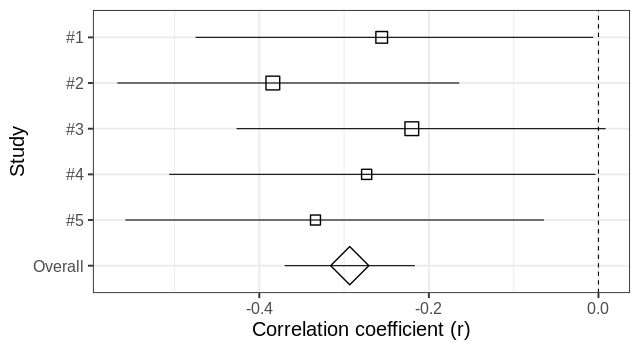

In [ ]:
%%R -w 640 -h 350 -u px
# Enter your code below this comment

# Make forest plot for the primary endpoint using ggplot
ggplot() +
  geom_pointrange(data=primary_table, aes(x=es, y=Study, xmin=ci.lo,
                                          xmax=ci.hi),
                  size = n * 0.02, shape = 0) +
  geom_pointrange(data = primary_results_dataframe, aes(x=mean_r, y="Overall",
                                                        xmin=CI_Lower,
                                                        xmax=CI_Upper),
                                                        size=3, shape=5) +
  geom_vline(aes(xintercept=0), linetype="dashed") +
  # this adds a vertical dashed line at the null value (r=0)
  scale_x_continuous (name="Correlation coefficient (r)") +
  scale_y_discrete (name="Study", limits=rev) +
  theme_bw (base_size=20)


<br><font color='red'> <u><b>Question</b></u>:<br> Write a caption (i.e. figure legend) for the forest plot you created.</font>


A forest plot plotting the correlation coefficient (r) against the number of study. The squares represent the confidence intervals and correlation coefficients for the primary endpoint of every study. The diamond represents the weighted mean correlation coefficient (for all studies).


###**Part 2b: Meta-analysis of a categorical outcome**

####**Calculating standardized effect sizes from 2x2 contingency tables**

<font color='blue'> <u><b>Coding Task</u></b>:<br> Calculate standardized effect sizes for the <b><u>secondary</u></b> endpoint in the form of <b>Pearson's correlation coefficients</b> using the 2x2 contingency table results of responder rates with CBD (yes/no) and PBO (yes/no), which you already assigned to variables at the begining of part 2 using the information within the study text excerpts. Ensure that you assign the estimates of the correlation coefficients of the studies to a variable called <tt><mark>r</mark></tt>, which should be numeric vector containing five elements - you will use it later. Print a table reporting the following variables (columns) for each study (row):</font>
<ul>
<font color='blue'>
  <li><tt><mark>Study</mark></tt>: The study identifier.</li>
  <li><tt><mark>n</mark></tt>: The total number of participants in the study.</li>
  <li><tt><mark>r</mark></tt>: The effect size for the <b><u>secondary</u></b> endpoint, standardized and represented specifically as the correlation coefficient.</li>
  <li><tt><mark>SE</mark></tt>: The standard error of the correlation coefficient.</li>
  <tt><mark>CI_95</mark></tt>: The confidence interval for the correlation coefficient. The table entries for <tt><mark>CI_95</mark></tt> should be formatted consistent with APA style, in square brackets and separated by a comma. For example: [<tt><mark>ci.lo</mark></tt>, <tt><mark>ci.hi</tt>].</li>
</font>
</ul>

Your answer must use the <tt>esc_2x2</tt> function from the <tt>esc</tt> package. <i>Hint</i>: The <tt>combine_esc</tt> function from the <esc> package can be used to combine information from multiple effect size calculations into a single data frame.

In [ ]:
%%R
# Calculation of the correlation coefficient using the results of the
# contingency table
secondary_es1 <- esc_2x2 (grp1yes[1], grp1no[1], grp2yes[1], grp2no[1],
                          "r", Study[1])
secondary_es2 <- esc_2x2 (grp1yes[2], grp1no[2], grp2yes[2], grp2no[2],
                          "r", Study[2])
secondary_es3 <- esc_2x2 (grp1yes[3], grp1no[3], grp2yes[3], grp2no[3],
                          "r", Study[3])
secondary_es4 <- esc_2x2 (grp1yes[4], grp1no[4], grp2yes[4], grp2no[4],
                          "r", Study[4])
secondary_es5 <- esc_2x2 (grp1yes[5], grp1no[5], grp2yes[5], grp2no[5],
                          "r", Study[5])

# Combines the effect sizes and assigns the effect size
# to a variable called r
secondary_table <- combine_esc (secondary_es1, secondary_es2, secondary_es3,
                                secondary_es4, secondary_es5) %>% print (.)

# Results table creation
secondary_table %>%
  mutate (.,
          "CI_95" = sprintf ("[%+.2f, %+.2f]", ci.lo, ci.hi)) %>%
  select (.,
          "r" = es,
          CI_95) %>%
  kable (.,
         "simple",
         align = "r",
         digits = c(2,0))









  study         es   weight sample.size        se        var        ci.lo
1    #1 0.16424449 46.21542          60 0.1470979 0.02163780 -0.121950863
2    #2 0.26733558 52.09266          72 0.1385517 0.01919656  0.002435855
3    #3 0.40932636 34.05295          72 0.1713652 0.02936603  0.098610581
4    #4 0.03677788 35.73783          51 0.1672769 0.02798156 -0.283112156
5    #5 0.15513349 39.39252          51 0.1593284 0.02538553 -0.154631161
      ci.hi  fishers.z     ci.lo.z   ci.hi.z measure
1 0.4252244 0.16574576 -0.12256087 0.4540524       r
2 0.4971764 0.27399211  0.00243586 0.5455484       r
3 0.6473197 0.43480173  0.09893209 0.7706714       r
4 0.3493043 0.03679448 -0.29106219 0.3646511       r
5 0.4371274 0.15639628 -0.15588160 0.4686742       r


    r            CI_95
-----  ---------------
 0.16   [-0.12, +0.43]
 0.27   [+0.00, +0.50]
 0.41   [+0.10, +0.65]
 0.04   [-0.28, +0.35]
 0.16   [-0.15, +0.44]


<br><font color='red'> <u><b>Question</b></u>:<br> Here, we expect the standardized effect sizes (<i>r</i> ) of the secondary endpoint to have the opposite sign to the standardized effect sizes (<i>r</i>) that you calculated for the primary endpoint. Why is this? </font>


There is a negative relationship between CBD treatment and seizure frequency as shown by the negative r values for the primary endpoint. Therefore, we would expect the number of patients who have not responded to CBD to be lower and the patients that have responded to placebo be higher, and therefore the r values for the secondary endpoint are positive. This is because CBD treatment must be efficacious in reducing seizure frequency unlike placebo.


####**Meta-analysis: Calculation of overall effect size** - Confidence intervals using the *t*-statistic critical value

<font color='blue'> <u><b>Coding Task</b></u>:<br> Perform all the calculations to run a meta-analysis using the method of Hunter & Schmidt for the <u><b>secondary</b></u> endpoint. The variables computed must include the number of studies (<tt><mark>k</mark></tt>), the weighted mean correlation coefficient (<tt><mark>mean_r</mark></tt>) and it's corresponding variance (<tt><mark>var_r</mark></tt>), standard error (<tt><mark>se_r<mark></tt>), and lower and upper limits of 95% confidence intervals (<tt><mark>CI_Lower</mark></tt> and <tt><mark>CI_Upper</mark></tt>) using the critical value (<tt><mark>z_crit</mark></tt>) calculated from <u>Student's <i>t</i>-distribution</u> with <tt>k-1</tt> degrees of freedom. Print a table with a reporting the following variables (columns) for the overall effect size (1 row):</font>
<ul>
<font color='blue'>
  <li><tt><mark>k</mark></tt> : The number of studies.</li>
  <li><tt><mark>N</v></tt> : The sum of participants from all studies.</li>
  <li><tt><mark>mean_r</mark></tt> : The overall standardized effect size (weighted-mean correlation coefficient) for the primary endpoint.</li>
  <li><tt><mark>mean_se</mark></tt> : The standard error the weighted-mean correlation coefficient.</li>
  <li><tt><mark>t_crit</mark></tt> : The critical value from Student's <i>t</i>-distribution.</li>
  <li><tt><mark>CI_95</mark></tt> : The 95% confidence interval of the weighted-mean correlation coefficient. The table entries for <tt><mark>CI_95</mark></tt> should be formatted consistent with APA style, in square brackets and separated by a comma. For example: [<tt><mark>CI_Lower</mark></tt>, <tt><mark>CI_Upper</tt>].</li>
</font>
</ul>

[](#RemoveThisTextCell)
Your answer must use the following information to perform it's calculations:
<ul>
  <li>The weighted mean, <tt>mean_r</tt>, can be calculated using the following formula:
$$mean\_r = \frac{\sum_{i=1}^k{n_i \cdot r_i}}{\sum_{i=1}^k{n_i}}$$<br></li>
  <li>The weighted variance, <tt>var_r</tt>, can be calculated using an almost identical equation, except you replace <tt>r</tt> with <tt>(r-mean_r)<sup>2</sup></tt>, as shown below:
$$var\_r = \frac{\sum_{i=1}^k{n_i\cdot (r_i - mean\_r)^2}}{\sum_{i=1}^k{n_i}}$$<br>
Since the equations for <tt>mean_r</tt> and <tt>var_r</tt> have similar form, you are expected to define an function that can be used to calculate either depending on the input argument(s) provided.  </li>
  <li>The standard error, <tt>se_r</tt>, can be calculated using the following formula:
$$se\_r = \sqrt{ \frac{var\_r}{k} }$$<br></li>
  <li>The confidence interval limits for <tt>mean_r</tt> should be calculated by normal theory using the following formula:
$$ CI\_Lower =  mean\_r -  se\_r \cdot t\_crit $$
$$ CI\_Upper =  mean\_r +  se\_r \cdot t\_crit $$<br></li>
  <li>The critical value of the <i>t</i>-statistic used for calculating confidence intervals must be the obtained from the *t*-statistic at <tt>k-1</tt> degrees of freedom using the `qt` function.</li>

In [ ]:
%%R
# Summary table of results for overall effect size with confidence intervals
# this calculates the number of studies and the sum of participants across all
# studies
r <- secondary_table$es %>% print(.)
n <- secondary_table$sample.size %>% print(.)
k <- length(r) %>% print(.)
N <- sum(n) %>% print(.)

# Frequency weighted mean correlation coefficient of the studies
# calculation
mean_r <- weighted.mean(r, n) %>% print(.)

# Corresponding variance calculation
var_r <- weighted.mean((r - mean_r)^2, n) %>% print(.)

# Standard error of the weighted mean correlation coefficient calculation
se_r <- sqrt(var_r/k) %>% print(.)

# 95% confidence intervals calculation
X <- 95
z_crit <-qnorm ((1 - X/100)/2, lower.tail=FALSE) %>% print (.)
CI_Lower <- (mean_r - se_r*z_crit) %>% print(.)
CI_Upper <- (mean_r + se_r*z_crit) %>% print(.)

t_crit <-qt ((1 - 0.95)/2, k-1, lower.tail=FALSE) %>% print(.)

CI_Lower <- (mean_r - se_r*t_crit) %>% print(.)
CI_Upper <- (mean_r + se_r*t_crit) %>% print(.)

# Secondary results dataframe calculation
secondary_results_dataframe <- data.frame(k, N, mean_r, se_r,
                                          t_crit, CI_Lower, CI_Upper)
secondary_results_dataframe%>%
  kable("simple",
        align = "r",
        digits=c(0,0,2,2,2,2,2))



[1] 0.16424449 0.26733558 0.40932636 0.03677788 0.15513349
[1] 60 72 72 51 51
[1] 5
[1] 306
[1] 0.2234046
[1] 0.01585549
[1] 0.05631251
[1] 1.959964
[1] 0.1130341
[1] 0.3337751
[1] 2.776445
[1] 0.06705601
[1] 0.3797532


  k     N   mean_r   se_r   t_crit   CI_Lower   CI_Upper
---  ----  -------  -----  -------  ---------  ---------
  5   306     0.22   0.06     2.78       0.07       0.38


<br><font color='red'> <u><b>Question</b></u>:<br> What would happen to the length of the confidence intervals if we replaced Student's <i>t</i>-critical value here with the standard normal <i>z</i>-critical value? In which situations will the bias correction introduced by using the critical value from Student’s <i>t</i>-distribution become more substantial?</font>



The confidence intervals would be smaller when using the t-critical value since the z-critical value does not account for a lower sample size, whilst the t critical value does account for the small sample size of 100 participants. This bias is more noticeable when using even smaller numbers of participants.


####**Meta-analysis: Checking for homogeneity of effect sizes** - Method without hypothesis testing


<font color='blue'> <u><b>Coding Task</b></u>:<br>
Calculate the values of, and print a table reporting, the following statistics (columns) for the heterogeneity analysis (1 row):</font>
<ul>
<font color='blue'>
  <li><tt><mark>var_r</mark></tt> : The total observed variance in study effect sizes. (You should have calculated this one already in the previous coding task)</li>
  <li><tt><mark>var_e</mark></tt> : The variance in study effect sizes (i.e. <i>r</i> ) attributed only to sampling error.</li>
  <li><tt><mark>var_p</mark></tt> : The variance in study effect sizes attributed to inconsistencies (i.e. heterogeniety) in the underlying population effect.</li>
  <li><tt><mark>I_sq</mark></tt> : The percentage variability attributed to inconsistencies (i.e.heterogeniety) in the underlying population effect rather than errors in population sampling.</li>
</font>
</ul>

[](#RemoveThisTextCell)
Your answer must use the following information to compute the <tt>I_sq</tt> statistic:
<ul>
  <li>The sampling error variance (<tt>var_e</tt>) is calculated using the following formula: $$var\_e = \frac{(1 - mean\_r^2)^2}{(\frac{N}{k} - 1)}$$
Note that you already calculated <tt>N</tt> and <tt>k</tt> in the previous task.</li>
  <li>Variability attributed to inconsistencies in the underlying population effect, <tt>var_p</tt>, can be simply calculated by subtracting the value of <tt>var_e</tt> from the total observed variability in effect sizes, <tt>var_r</tt>.</li>
  <li>Your code must enforce <tt>var_p</tt> to have a value no less than 0.</li>
  <li>The fraction <tt>I_sq</tt> must be expressed as a percentage.</li>
</ul>

In [ ]:
%%R
# Variance of r associated with chance
var_e <- (1-mean_r^2)^2/(N/k-1) %>% print(.)

# Variance in r associated with heterogeneity
var_p <- max(0, var_r - var_e) %>% print(.)

# I^2 % variability calculation associated with inconsistencies
# in the underlying population effect
I_sq <- (100*var_p/var_r) %>% print(.)


# This adds statistics for homogeneity to our existing summary results data frame
secondary_results_dataframe <- data.frame(k, N, mean_r, se_r, t_crit,
                                          CI_Lower, CI_Upper, var_r,
                                          var_e, var_p, I_sq)
print (secondary_results_dataframe)

# Table of summary results for testing the null hypothesis that the
# studies sample from the same population (fixed effect inference).
summary_secondary_results <- data.frame(var_r, var_e, var_p, I_sq)
summary_secondary_results%>%
  kable("simple",
        align = "r",
        digits=c(2,2,2,2))


[1] 60.2
[1] 0.0008609469
[1] 5.42996
  k   N    mean_r       se_r   t_crit   CI_Lower  CI_Upper      var_r
1 5 306 0.2234046 0.05631251 2.776445 0.06705601 0.3797532 0.01585549
       var_e        var_p    I_sq
1 0.01499455 0.0008609469 5.42996


 var_r   var_e   var_p   I_sq
------  ------  ------  -----
  0.02    0.01       0   5.43


<br><font color='red'> <u><b>Question</b></u>:<br> Use the thresholds for <i>I</i><sup> 2</sup> outlined in the <i>Cochrane Handbook for Systematic Reviews of Interventions</i> (https://tinyurl.com/3m694522) to interpret your result. If <i>I</i><sup> 2</sup> happens to be large, what simple change could we make to the intervals that we have calculated to relax this assumption and turn this into a random effects model? (<i>Hint</i>: the answer to the last question relates to a unique feature of the Hunter-Schmidt random-effects model)</font>


The I^2 value is very low (5.43), suggesting that there is minimal variability
in the estimate of effect size that is due to a cause other than chance. Using the Hunter-Schmidt random-effects model as a simple change justifies any variability such as heterogeneity for each study and also the variability between each study and so can be used if the I^2 is too large, which would make the confidence intervals wider.

####**Meta-analysis: Forest plot of effect sizes** (Advanced)

<font color='blue'> <u><b>Coding Task</b></u>:<br> Create a forest plot including your computed correlation coefficients and confidence intervals of the <u><b>secondary</b></u> endpoint for the individual studies (using the □ symbol), and the weighted-mean correlation coefficient (using the ◇ symbol). This time, make the size of the symbols for the individual study effect sizes (□) proportional to the number of partcipants in the respective studies.</font>


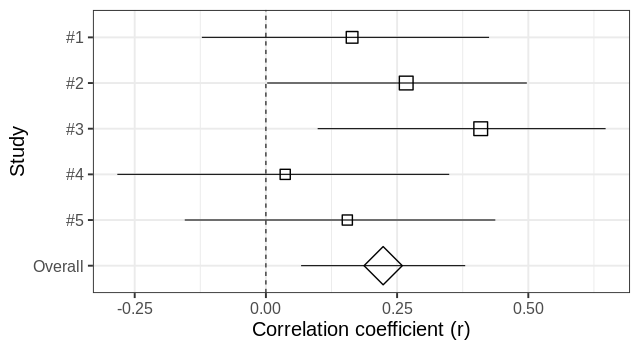

In [ ]:
%%R -w 640 -h 350 -u px

# this creates a forest plot for the secondary endpoint
ggplot() +
  geom_pointrange(data=secondary_table, aes(x=es, y=Study, xmin=ci.lo,
                                            xmax=ci.hi),
                  size = n * 0.02, shape = 0) +
  geom_pointrange(data = secondary_results_dataframe, aes(x=mean_r, y="Overall",
                                                          xmin=CI_Lower,
                                                          xmax=CI_Upper),size=3,
                                                          shape=5) +
  geom_vline(aes(xintercept=0), linetype="dashed") +
  # this adds a vertical dashed line at the null value (r=0)
  scale_x_continuous (name="Correlation coefficient (r)") +
  scale_y_discrete (name="Study", limits=rev) +
  theme_bw (base_size=20)

[](#RemoveThisTextCell)
## Run this section to export and download the HTML of your problem set



[](#RemoveThisTextCell)
Save your notebook and then run this hidden python code cell below to export and download an HTML document of your problem set assignment. Open the HTML to check that you are happy with it and that it appears as you expect<sup>*</sup>. You must then submit the **HTML** document to the relevant Canvas Online submission point.

<sup>*</sup>*Note that some of the provided instructional and functional content in this notebook is deliberately omitted from the output HTML to reduce the size of the document and the amount of matching content identified by Turnitin. If you receive an error below saying that 'cand_no' is not defined, then go back and run the cell where you entered your candidate number and then try to run this section again.*





In [ ]:
#RemoveCodeFromIPYNB
# @title Running this hidden python code cell prepares and exports the HTML document  - <mark>Do <b><u>NOT</u></b> click '<tt>Show code</tt></mark>' { display-mode: "form" }

#!!!!!!!!!!!!!!!!!!!!!! DO NOT EDIT THIS PYTHON CODE CELL !!!!!!!!!!!!!!!!!!!!!!
# You can see this code because you accidently clicked 'Show code' for this
# hidden cell. Hide it again by clicking the button in the top-left corner of
# this cell containing a down arrowhead symbol (⌄). (If you hover the mouse
# cursor over the button in question for a couple of seconds, a tool-tip will
# appear saying "Hide code".)

# Navigate to 'content' directory
!cd /content

# Remove temporary files from the colab instance if they exist
!rm -f notebook.ipynb notebook.html

# Import required modules
import google, json

# Get the notebook and return it as a dictionary
nb  = google.colab._message.blocking_request("get_ipynb", timeout_sec=5)

# Remove any cells in the notebook starting with #RemoveCodeFromIPYNB
cellnum = 0;
celldel = [];
for cell in nb["ipynb"]["cells"]:
  if cell["source"]:
    if (cell["source"][0][0:20] == "#RemoveCodeFromIPYNB"):
      celldel.append(cellnum)
  cellnum += 1
[nb["ipynb"]["cells"].pop(i) for i in reversed(celldel)]

# Save a temporary copy of the notebook in the colab instance
fid = open("notebook.ipynb", "w", encoding="utf-8")
json.dump(nb["ipynb"], fid, indent=2)
fid.close()

# Move the VariableInspectorWindow widget to the Appendix at the end of the notebook
import nbformat
with open('notebook.ipynb', 'r') as f:
    nb = nbformat.read(f, as_version=4)
flag = False
for cell in reversed(nb.cells):
    if flag:
        nb.cells.append(prevcell)
        nb.cells.remove(cell)
        nb.cells.remove(prevcell)
        break
    else:
        if cell.get('source') == 'VariableInspectorWindow(get_ipython())':
            prevcell = cell
            flag = True
with open('notebook.ipynb', 'w') as f:
    nbformat.write(nb, f)

# Export the notebook file as an html
!jupyter nbconvert --execute --to html "notebook.ipynb"

# Hack to fix HTML rendering of the variable inspector widget
from lxml import html
tree = html.parse("notebook.html")
root = tree.getroot()
for elem in root.xpath('//script[contains(@type,' + \
                       '"application/vnd.jupyter.widget-state+json")]'):
  elem.text = elem.text.replace("&gt;",">")
  elem.text = elem.text.replace("&lt;","<")

# Remove cell output for code cell in the notebook containing the #RemoveCellOutputFromHTML tag
for elem in root.xpath('//span[contains(@class,"c1")]'):
  if elem.text == "#RemoveCellOutputFromHTML":
    span = elem.getparent()
    code = span.getparent()
    CodeMirror = code.getparent()
    CodeMirrorEditor = CodeMirror.getparent()
    InputArea = CodeMirrorEditor.getparent()
    InputWrapper = InputArea.getparent()
    Cell = InputWrapper.getparent()
    OutputWrapper = Cell.getchildren()[1]
    Cell.remove(OutputWrapper)

# Remove cell input for code cell in the notebook containing the #RemoveCellInputFromHTML tag
for elem in root.xpath('//span[contains(@class,"c1")]'):
  if elem.text == "#RemoveCellInputFromHTML":
    span = elem.getparent()
    code = span.getparent()
    CodeMirror = code.getparent()
    CodeMirrorEditor = CodeMirror.getparent()
    InputArea = CodeMirrorEditor.getparent()
    InputWrapper = InputArea.getparent()
    Cell = InputWrapper.getparent()
    OutputWrapper = Cell.getchildren()[0]
    Cell.remove(OutputWrapper)

# Remove all text cells in the notebook containing the [](#RemoveThisTextCell) href tag
for elem in root.xpath('//a[contains(@href,"#RemoveThisTextCell")]'):
    hyperlink = elem.getparent()
    hyperlink.values()
    RenderedHTMLCommon = hyperlink.getparent()
    RenderedHTMLCommon.values()
    InputArea = RenderedHTMLCommon.getparent()
    InputArea.values()
    CellInputWrapper = InputArea.getparent()
    CellInputWrapper.values()
    MarkdownCell = CellInputWrapper.getparent()
    MarkdownCell.values()
    MarkdownCell.getparent().remove(MarkdownCell)
tree.write("cand_no_{0}_notebook.html".format(cand_no), pretty_print=True, method="html", encoding="UTF-8")

# Download the html file
google.colab.files.download ("cand_no_{0}_notebook.html".format(cand_no))

# Delete temporary variables that we don't need anymore
#for v in ['cell','celldel','cellnum','fid','nb','root','tree']:
#  if v in locals():
#    del locals()[v]
#del locals()['v']

################## DO NOT EDIT ANY PYTHON CODE IN THIS CELL ####################

[NbConvertApp] Converting notebook notebook.ipynb to html
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] ERROR | unhandled iopub msg: colab_request
[NbConvertApp] WARNING | Alternative text is missing on 7 image(s).
[NbConvertApp] Writing 1050332 bytes to notebook.html


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Appendix**
The appendix is automatically populated with the R Variable Inspector when the HTML is generated. The appendix should not be used by students for any other reason in this particular assignment.